In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)  
from scipy import stats
import imageio
from PIL import Image

In [134]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    #Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97)'
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

# Q1_A

In [135]:
n=150 #Here we are dealing with constant sample size #Given
P_bar=0.0185 #Average proportion of defective items #Given
alpha=0.002 #Given

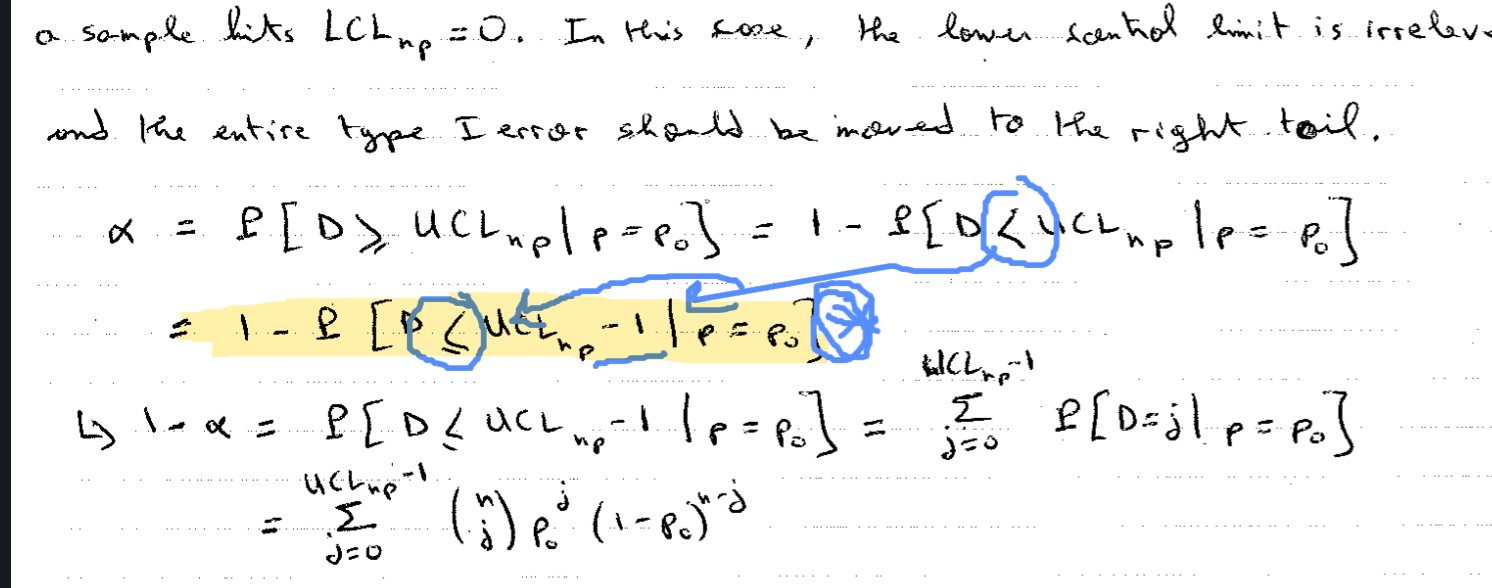

In [136]:

def LCL_np_chart(n,P_bar,alpha,printing=True):
    LCL=stats.binom.ppf(q=alpha/2,n=n,p=P_bar)
    if LCL==0:
        left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
        if printing: print(f'Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test')
        if printing:print(f'LCL is {LCL}')
        if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error} which is irelevant !!!")
        return 0,'one-sided'
    elif LCL>0:
        left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
        if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error}")
        #TODO: check with the instructor if the below is needed 
        if left_tail_type_1_error>alpha/2:
            LCL=max(0,LCL-1)
            left_tail_type_1_error=stats.binom.cdf(k=LCL,n=n,p=P_bar)
            if printing:print(f'LCL is {LCL}')
            if printing: print(f"The right tail type 1 error is equal to {left_tail_type_1_error} which is irelevant !!!")
            return LCL,'two-sided'


In [137]:
def UCL_np_chart(n,P_bar,alpha,mode='two-sided',printing=True,conservative=True):
    if mode not in ['two-sided','one-sided']:

        if printing: print('Mode should be either two-sided or one-sided')
        return None
    else:
        if printing: print(f'**************{mode} is Activated**************')    
        if mode=='two-sided':
            UCL=stats.binom.ppf(q=1-alpha/2,n=n,p=P_bar)
            right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
            if (right_tail_type_1_error>alpha/2):
                UCL+=1
                right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)   
        elif mode=='one-sided':
            if printing: print(f'Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test')
            UCL=stats.binom.ppf(q=1-alpha,n=n,p=P_bar)
            right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
            if (right_tail_type_1_error>alpha):
                UCL+=1
                right_tail_type_1_error=1-stats.binom.cdf(k=UCL-1,n=n,p=P_bar)
        
        
        if printing: print(f"Your UCL is {UCL}, leading to left tail type 1 error is equal to {right_tail_type_1_error}")
        if printing: print(f"If you reduce UCL to {UCL-1},  left tail type 1 error will be equal to {1-stats.binom.cdf(k=UCL-2,n=n,p=P_bar)}")
        if conservative: #alpha conservative
            if printing: print(f'Returning Alpha Conservative UCL of {UCL}')
            return UCL
        else:
            if printing: print(f'Returning Alpha Non-Conservative UCL of {UCL-1}')
            return UCL-1
        
        

In [138]:
LCL,mode_recommended=LCL_np_chart(n=150,P_bar=0.0185,alpha=0.002)


Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test
LCL is 0.0
The right tail type 1 error is equal to 0.06074990322036292 which is irelevant !!!


In [139]:
UCL=UCL_np_chart(150,0.0185,0.002,mode=mode_recommended,printing=True,conservative=False)


**************one-sided is Activated**************
Having Zero Defectives is Likely For Your Case, Switch to "one-sided" Test
Your UCL is 10.0, leading to left tail type 1 error is equal to 0.0005248256512309091
If you reduce UCL to 9.0,  left tail type 1 error will be equal to 0.002037967655534434
Returning Alpha Non-Conservative UCL of 9.0


# Q1 B

In [140]:
p_1=0.04 #Given
if mode_recommended=='two-sided':
    beta=stats.binom.cdf(UCL-1,n=n,p=p_1)-stats.binom.cdf(LCL+1,n=n,p=p_1)
elif mode_recommended=='one-sided':
    beta=stats.binom.cdf(UCL-1,n=n,p=p_1)-stats.binom.cdf(0,n=n,p=p_1)
print(f'beta is {beta}')

beta is 0.849299305058348


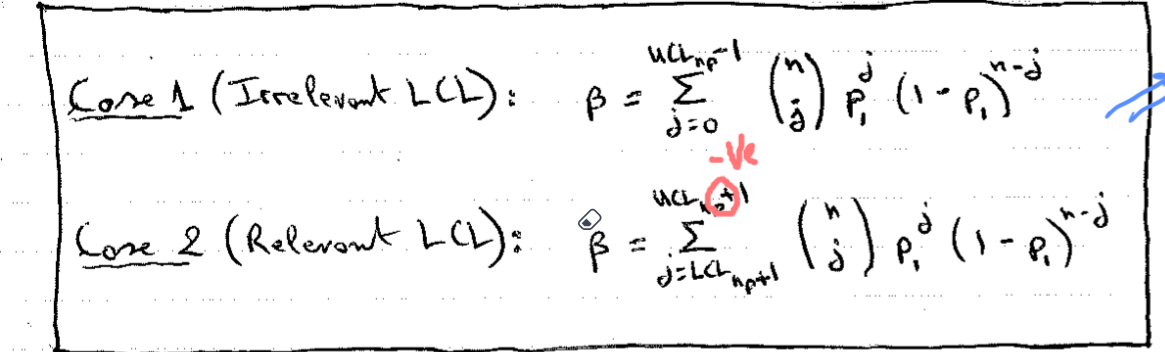

# Q1 C

Text(0.5, 1.0, 'beta vs n')

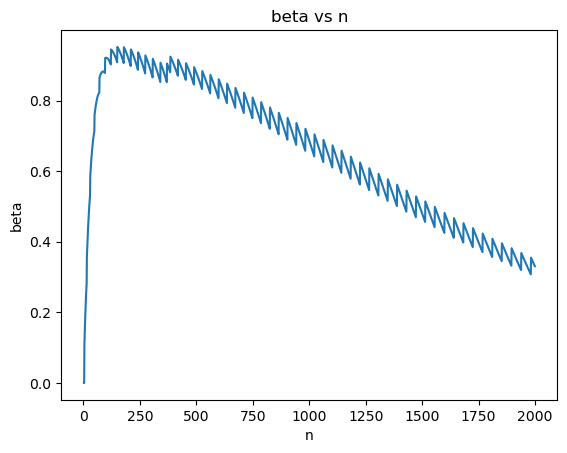

In [141]:
p_1=0.03 #Given
p_0=0.0185 #Given
alpha=0.002 #Given
beta_list=[]
LCL_list=[]
UCL_list=[]
null_hypothis_CL=[]
alternative_hypothis_CL=[]

n_list=np.arange(2,2000,1)
for n_current in n_list:
    LCL,mode_recommended=LCL_np_chart(n=n_current,P_bar=p_0,alpha=alpha,printing=False)
    UCL=UCL_np_chart(n=n_current,P_bar=p_0,alpha=alpha,mode=mode_recommended,printing=False,conservative=False)
    if mode_recommended=='two-sided':
        beta=stats.binom.cdf(UCL-1,n=n_current,p=p_1)-stats.binom.cdf(LCL+1,n=n_current,p=p_1)
    elif mode_recommended=='one-sided':
        beta=stats.binom.cdf(UCL-1,n=n_current,p=p_1)-stats.binom.cdf(0,n=n_current,p=p_1)
    beta_list.append(beta)
    LCL_list.append(LCL)
    UCL_list.append(UCL)
    null_hypothis_CL.append(p_0*n_current)
    alternative_hypothis_CL.append(p_1*n_current)
plt.plot(n_list,beta_list) #The plot look weird, in the beginning, increasing n increase beta error ??
plt.xlabel('n')
plt.ylabel('beta')
plt.title('beta vs n')

In [142]:
beta_list

[0.0,
 0.0,
 0.10952076,
 0.13279392150000002,
 0.154572124626,
 0.17492412103508992,
 0.19391588274747118,
 0.21161070704817797,
 0.2280693175963695,
 0.24334996187532631,
 0.257508505111709,
 0.2705985207882209,
 0.28267137786954155,
 0.35737738487792026,
 0.37446688875140455,
 0.39077930881631273,
 0.4063287917655666,
 0.42112984779940354,
 0.4351973006949099,
 0.4485462410058664,
 0.4611919822361743,
 0.4731500198371335,
 0.4844359928855565,
 0.49506564830612826,
 0.5050548075075894,
 0.5144193353082163,
 0.5231751110317356,
 0.531338001660223,
 0.5870882888847805,
 0.5976735673826036,
 0.6077911176449508,
 0.6174494307681216,
 0.6266568858977395,
 0.6354217597514864,
 0.6437522350654654,
 0.6516564080471439,
 0.6591422949127541,
 0.6662178375822152,
 0.6728909086000913,
 0.6791693153467848,
 0.6850608036001021,
 0.6905730605034586,
 0.6957137169933594,
 0.700490349735342,
 0.7049104826143155,
 0.708981587822159,
 0.7127110865825395,
 0.7596871122174617,
 0.7651239792966411,
 0.770

Text(0.5, 0, 'n')

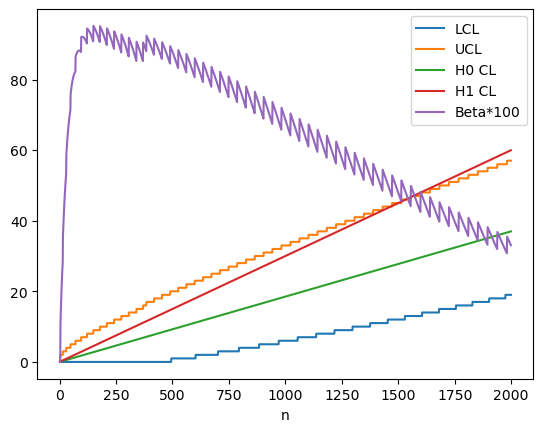

In [143]:
plt.plot(n_list,LCL_list,label='LCL')
plt.plot(n_list,UCL_list,label='UCL')
plt.plot(n_list,null_hypothis_CL,label='H0 CL')
plt.plot(n_list,alternative_hypothis_CL,label='H1 CL')
plt.plot(n_list,np.array(beta_list)*100,label='Beta*100')
plt.legend()
plt.xlabel('n')



Text(0.5, 0, 'n')

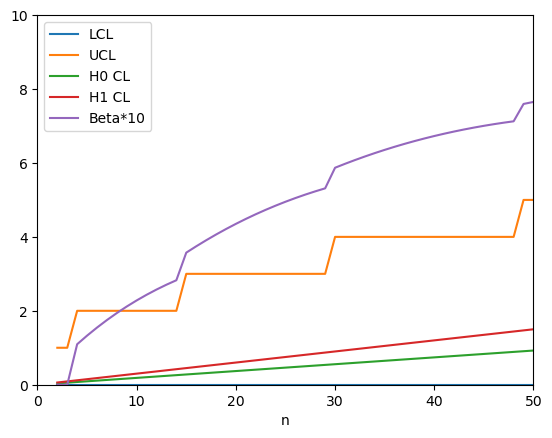

In [144]:
plt.plot(n_list,LCL_list,label='LCL')
plt.plot(n_list,UCL_list,label='UCL')
plt.plot(n_list,null_hypothis_CL,label='H0 CL')
plt.plot(n_list,alternative_hypothis_CL,label='H1 CL')
plt.plot(n_list,np.array(beta_list)*10,label='Beta*10')
plt.xlim(0,50)
plt.ylim(0,10)
plt.legend()
plt.xlabel('n')

In [145]:
target_beta=0.5
mask_satisfying=np.array(beta_list)<=target_beta
beta_satisfying=np.array(beta_list)[mask_satisfying]
n_satisfying=np.array(n_list)[mask_satisfying]

In [146]:
#n_satisfying[n_satisfying>250]
n_satisfying

array([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
         13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,
         24,   25, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430,
       1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466,
       1467, 1468, 1469, 1470, 1471, 1472, 1489, 1490, 1491, 1492, 1493,
       1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504,
       1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1522, 1523,
       1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534,
       1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545,
       1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556,
       1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567,
       1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578,
       1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589,
       1590, 1591, 1592, 1593, 1594, 1595, 1596, 15

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def get_binomial(n, p):
    # Generate an array of possible outcomes for the binomial distribution
    x = np.arange(0, n+1)

    # Calculate the probabilities for each outcome
    probabilities = np.zeros(n+1)
    for i in range(n+1):
        probabilities[i] = np.math.comb(n, i) * p**i * (1-p)**(n-i)

    # Return the x and y values of the distribution as arrays
    return x, probabilities

C:\Users\mabob\AppData\Local\Temp\ipykernel_24704\2875150994.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


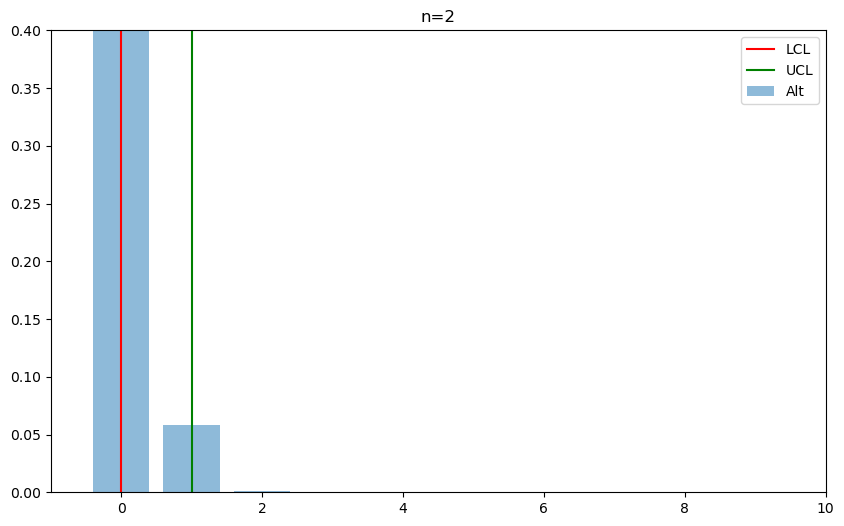

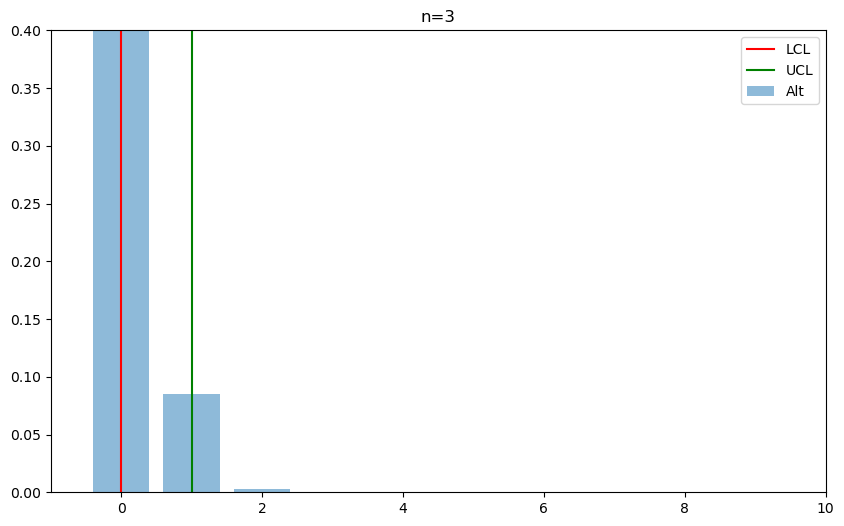

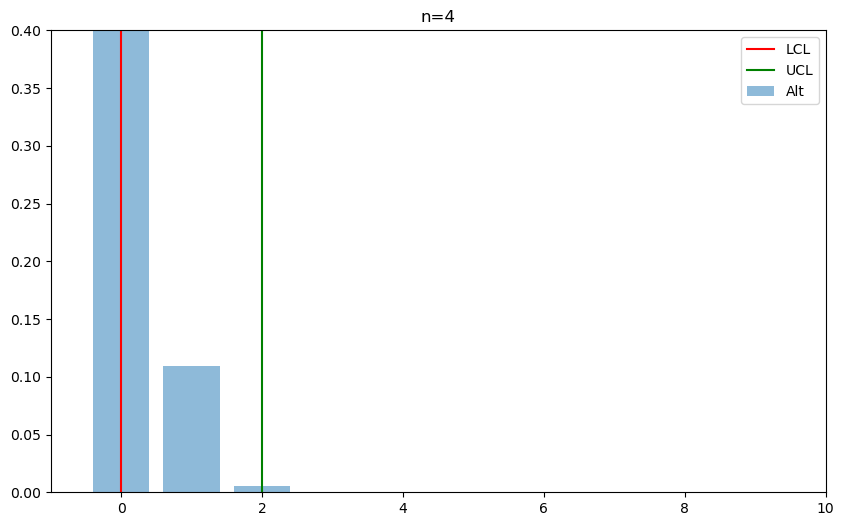

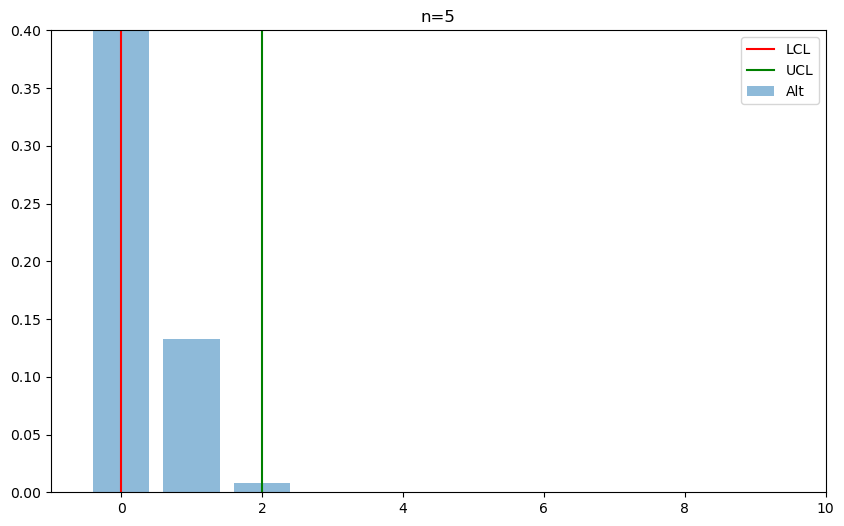

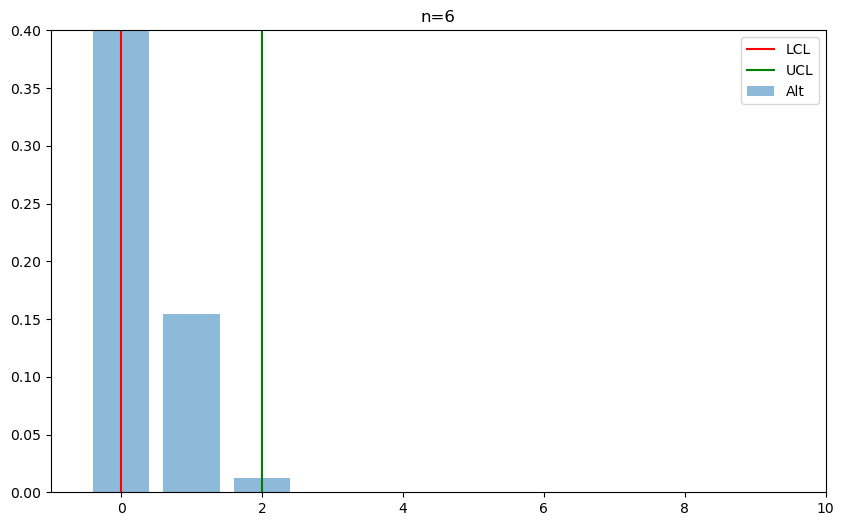

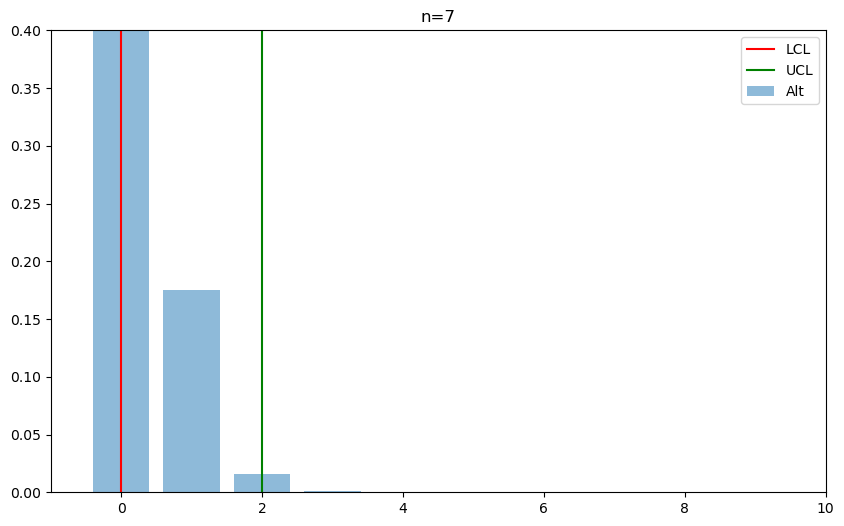

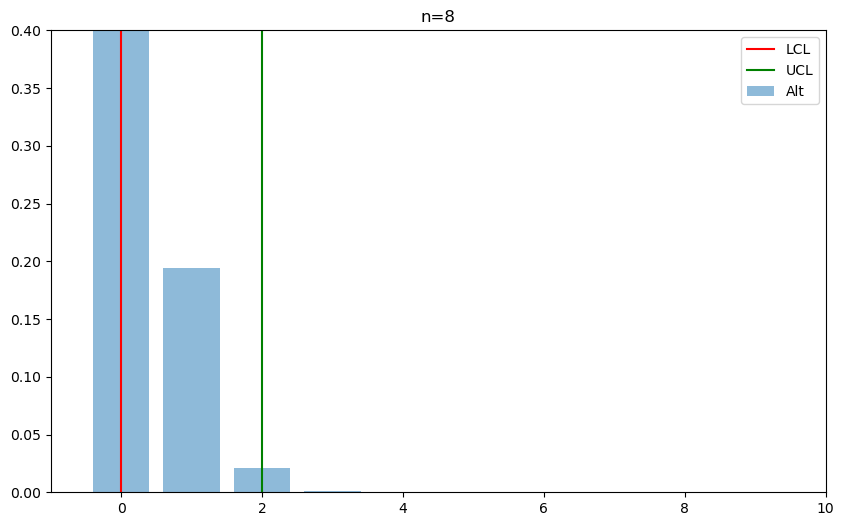

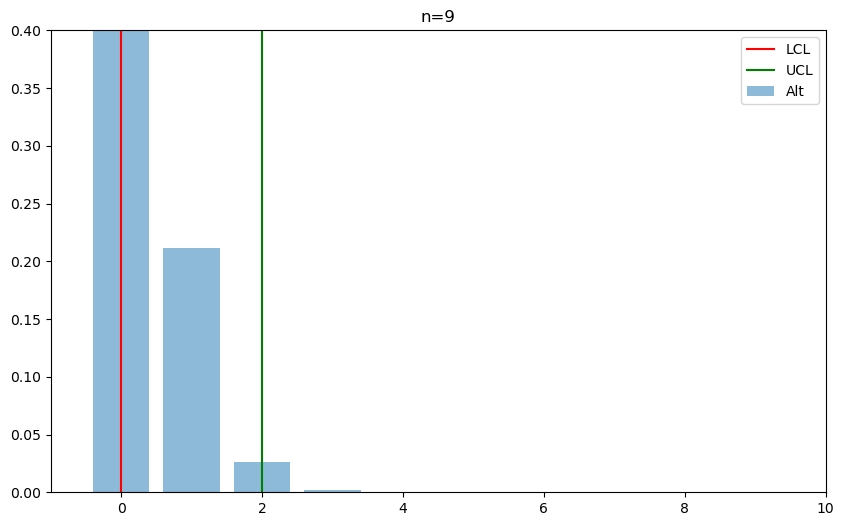

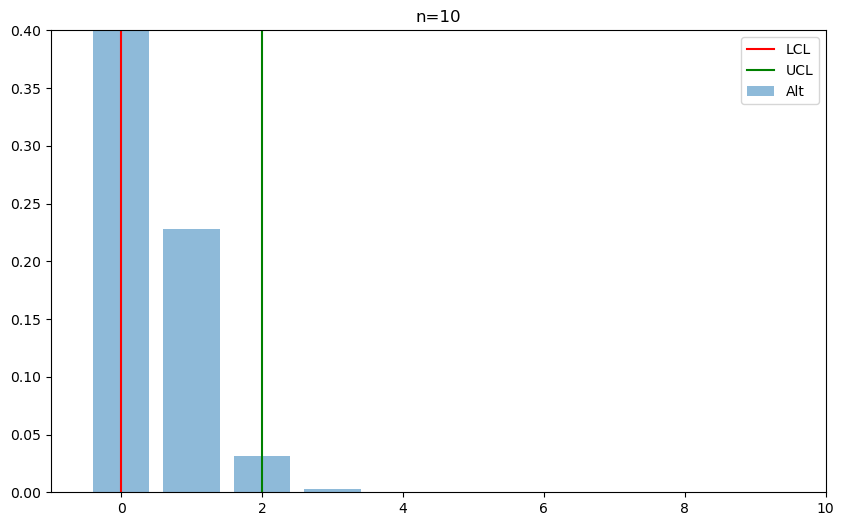

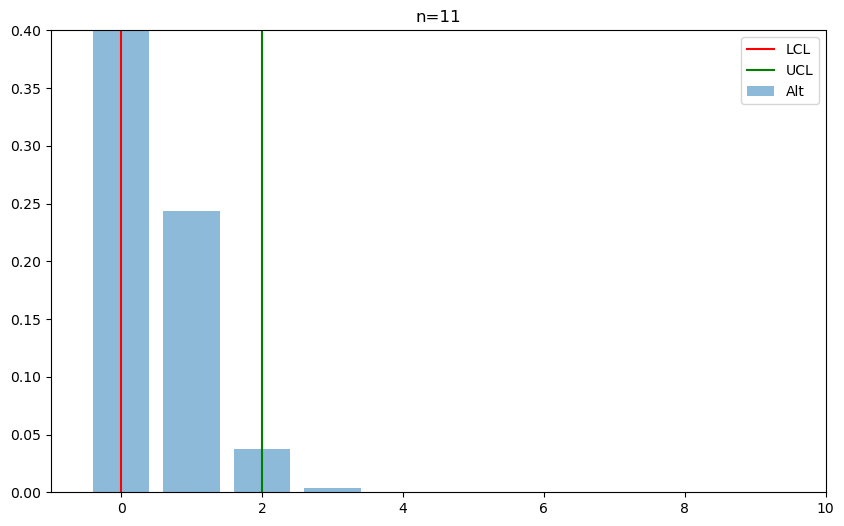

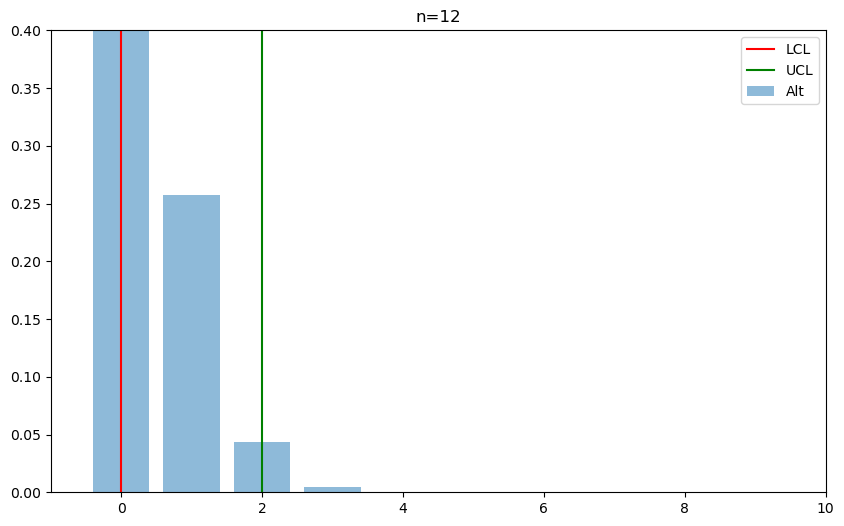

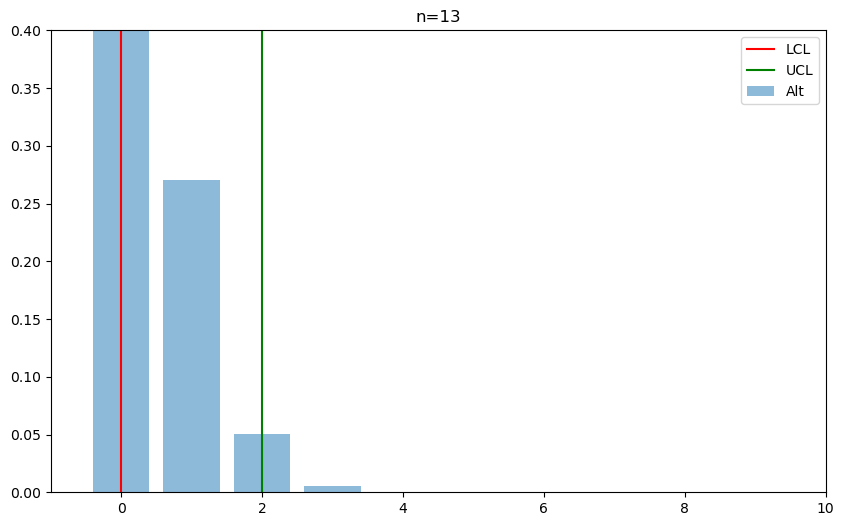

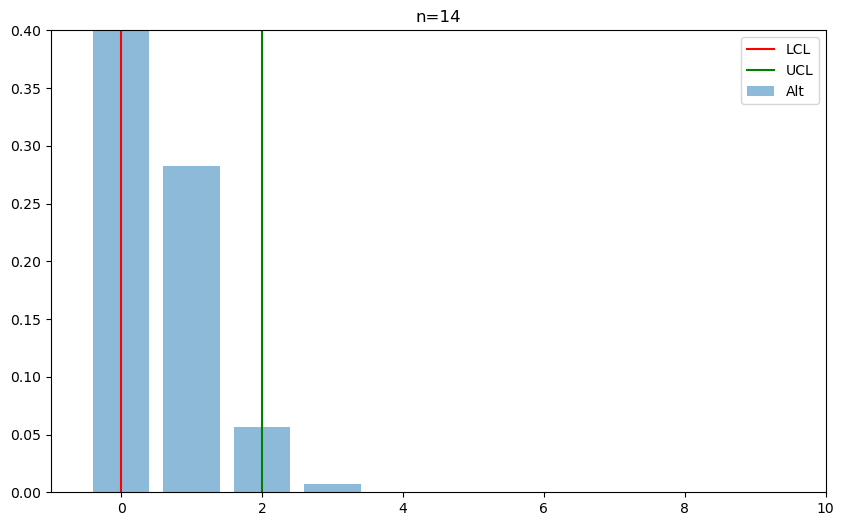

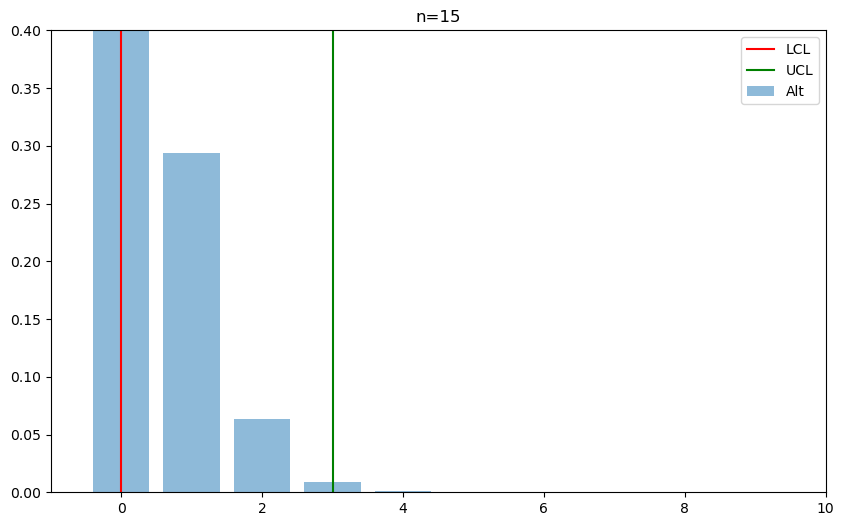

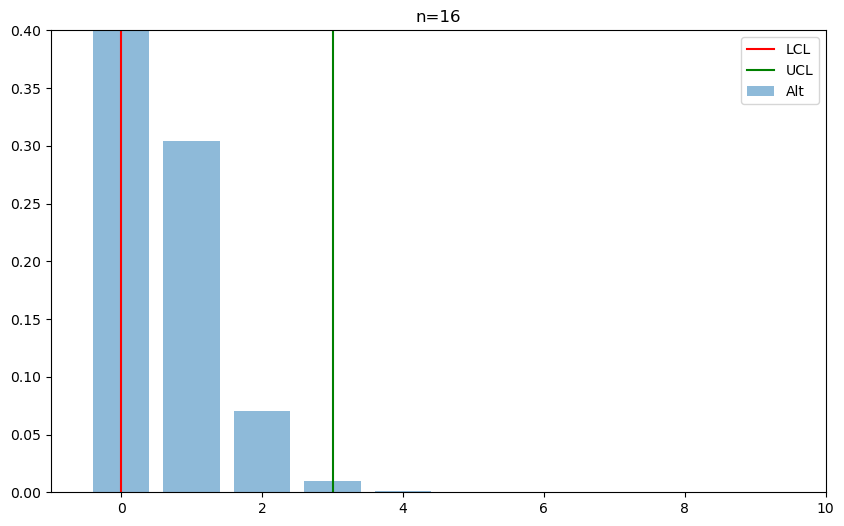

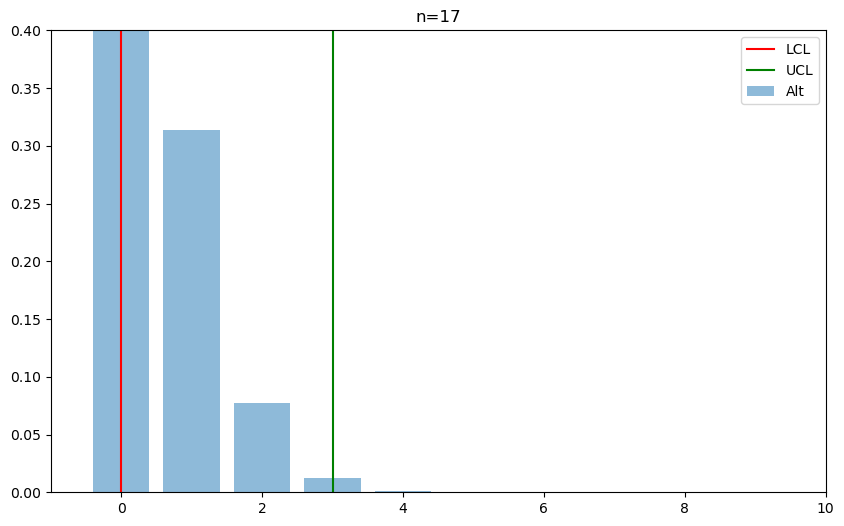

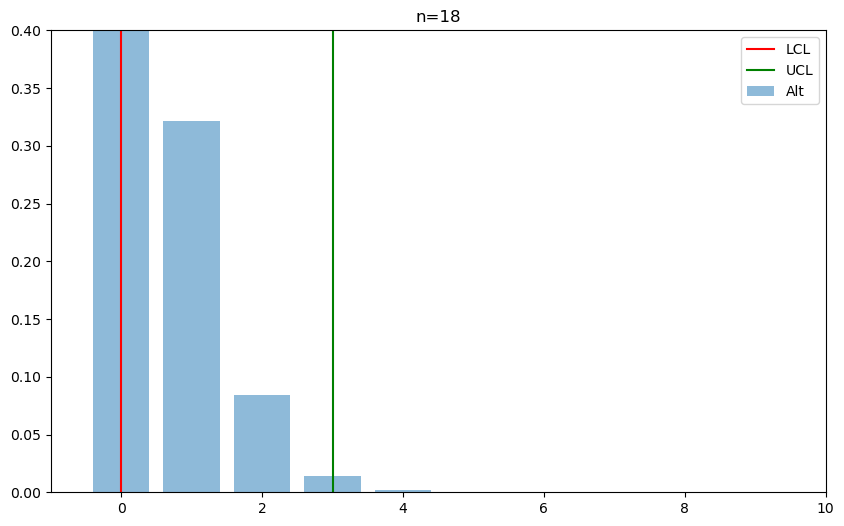

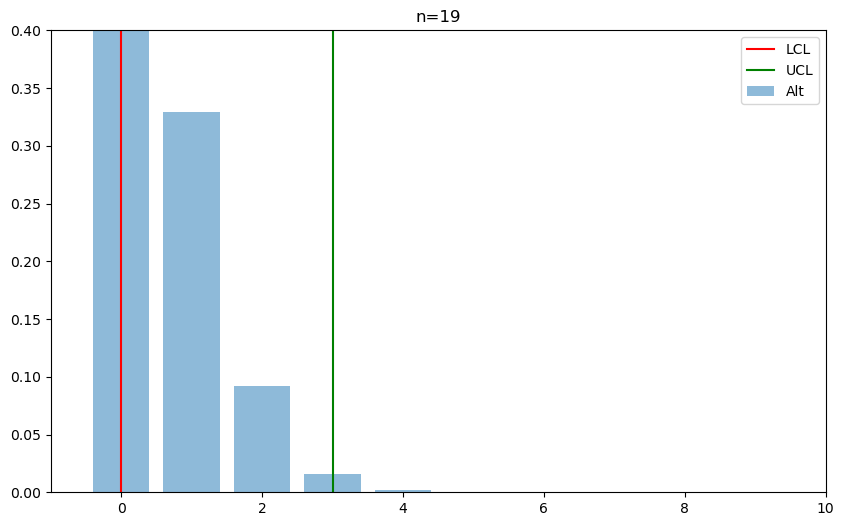

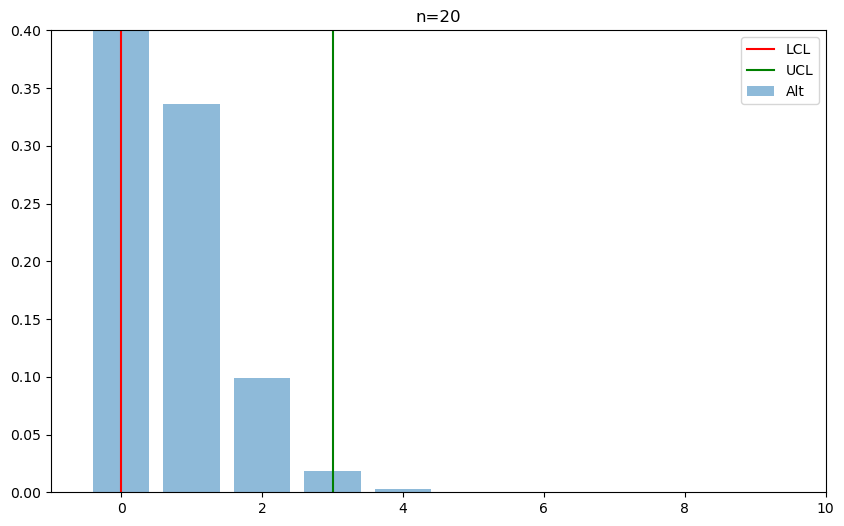

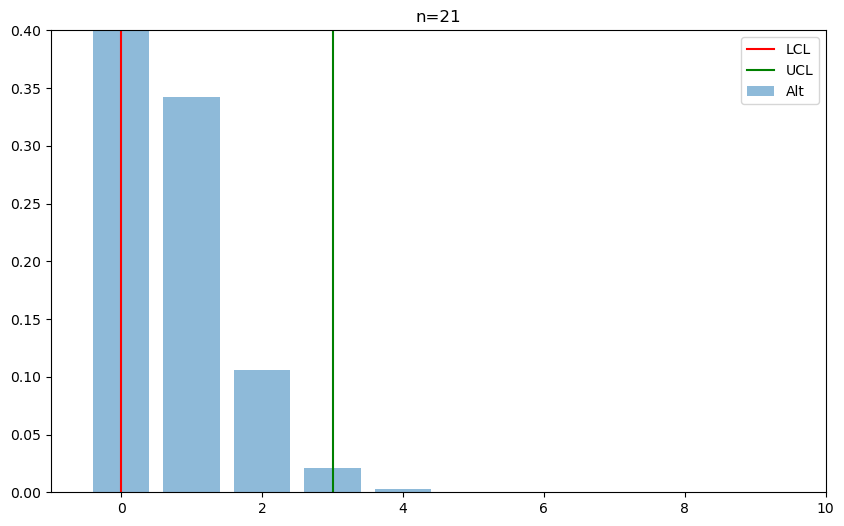

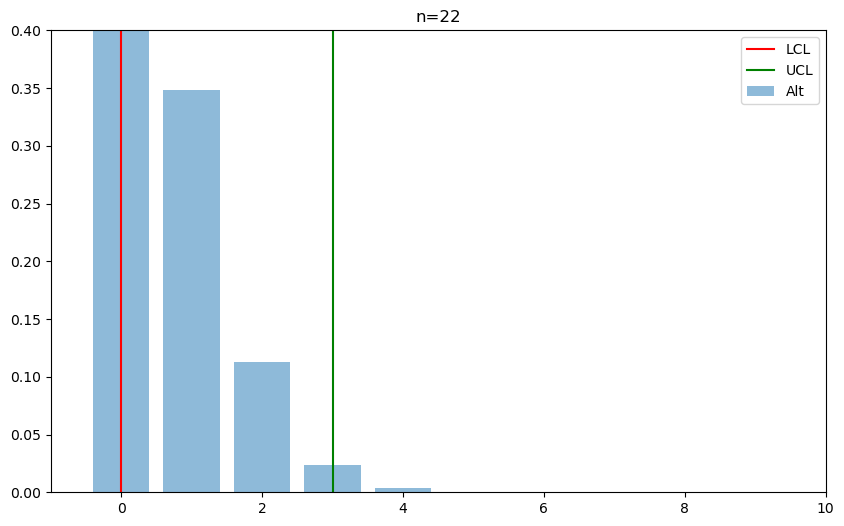

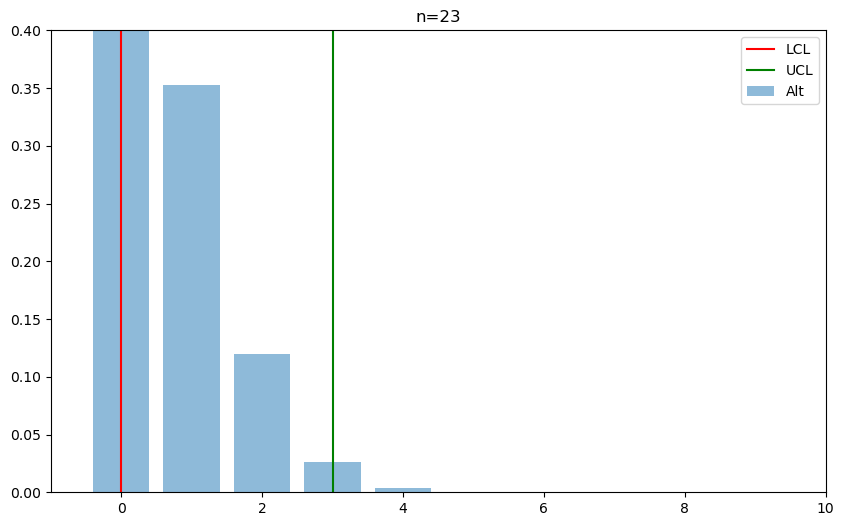

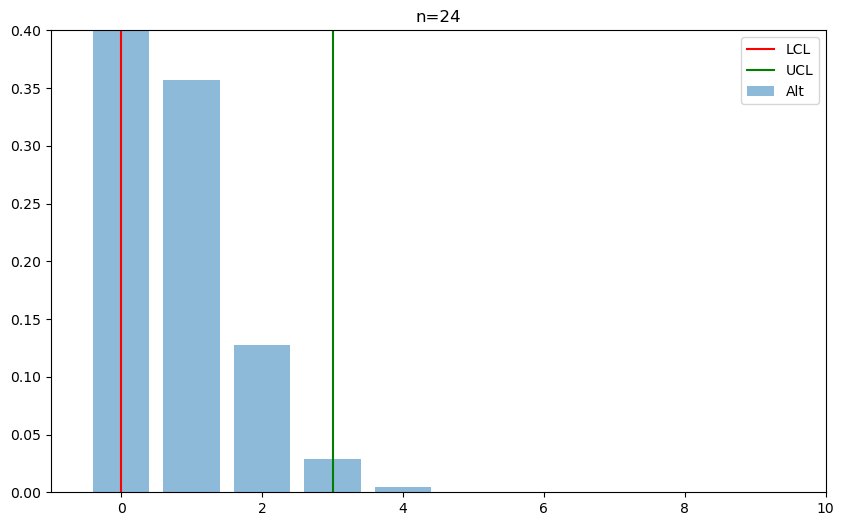

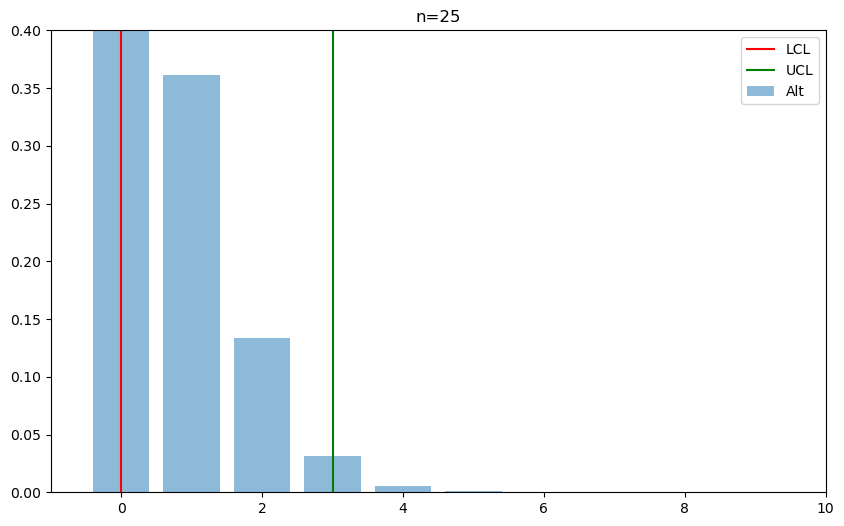

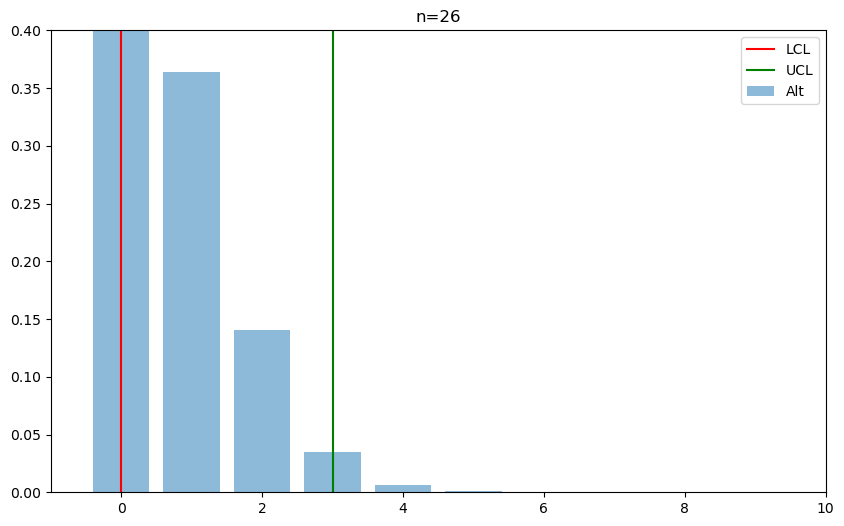

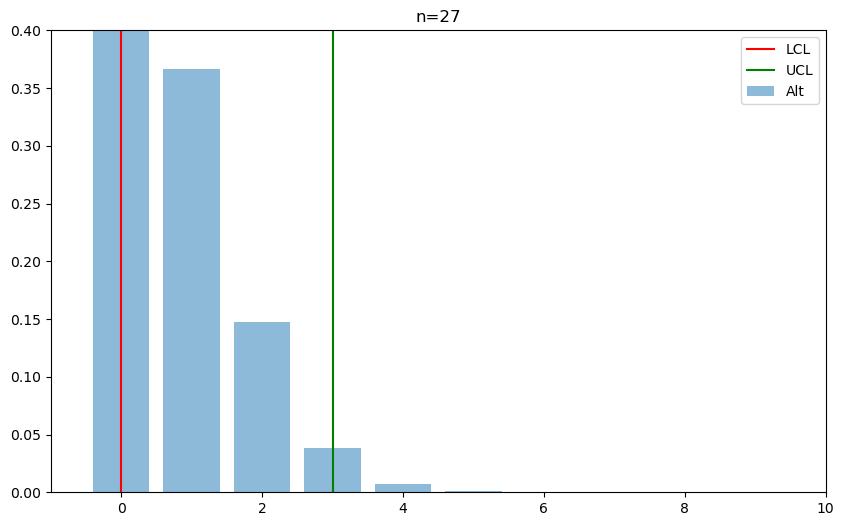

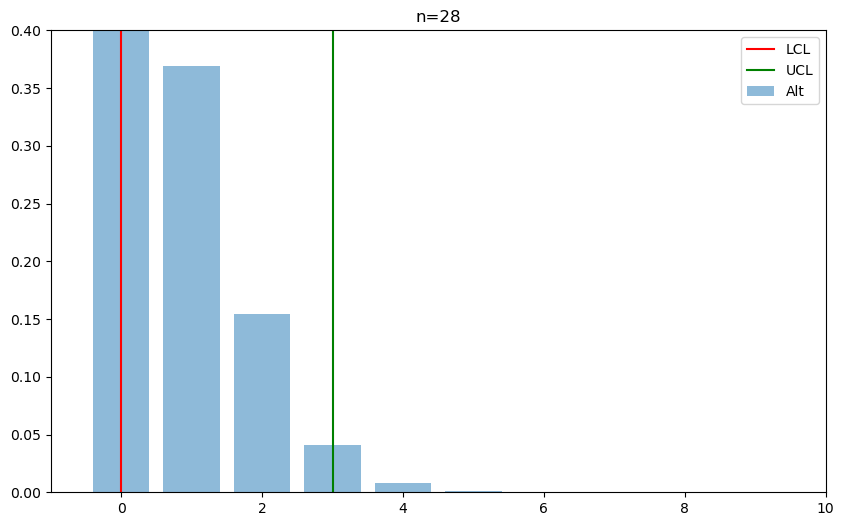

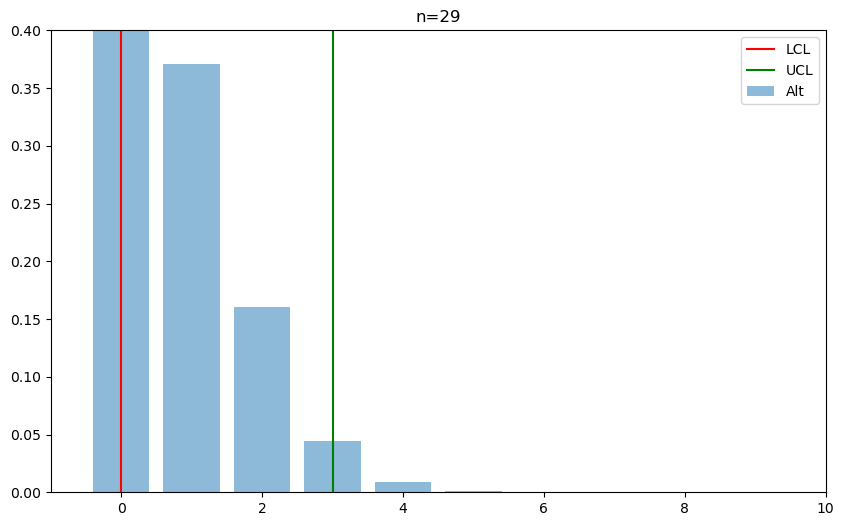

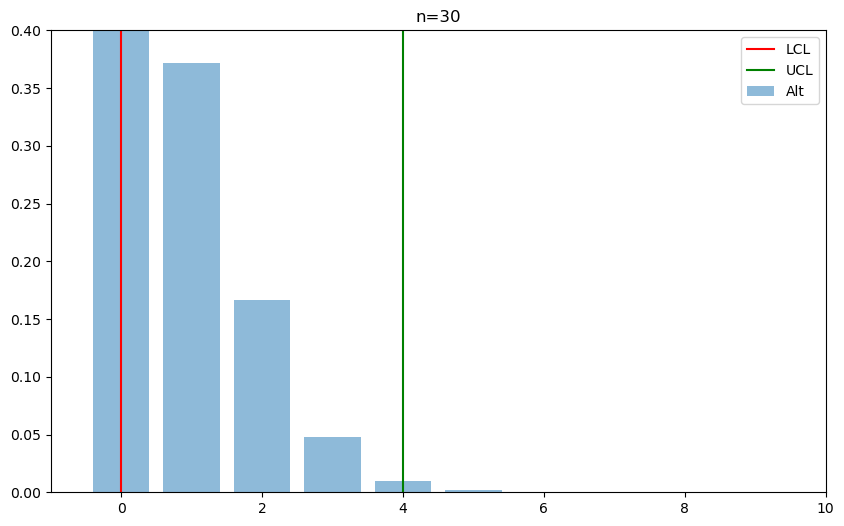

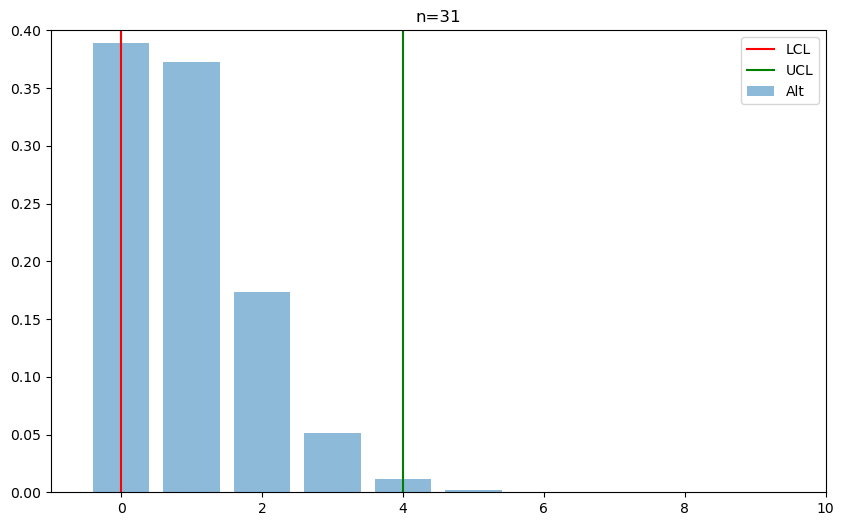

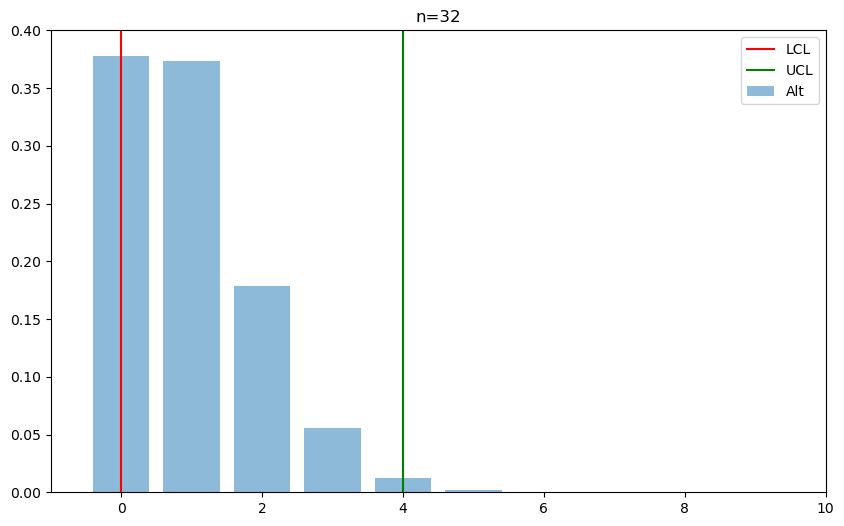

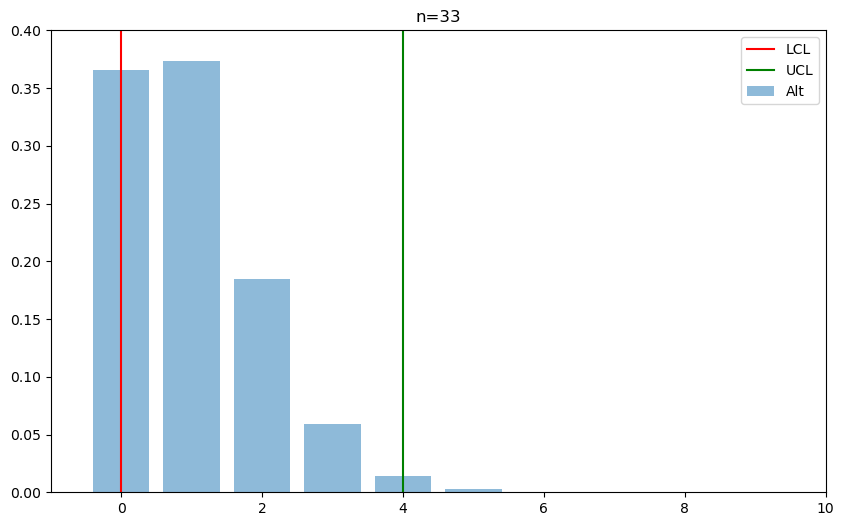

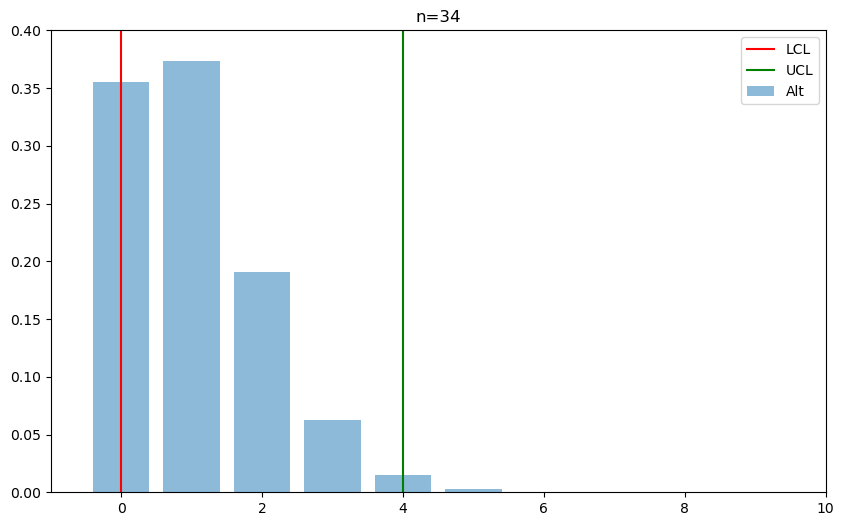

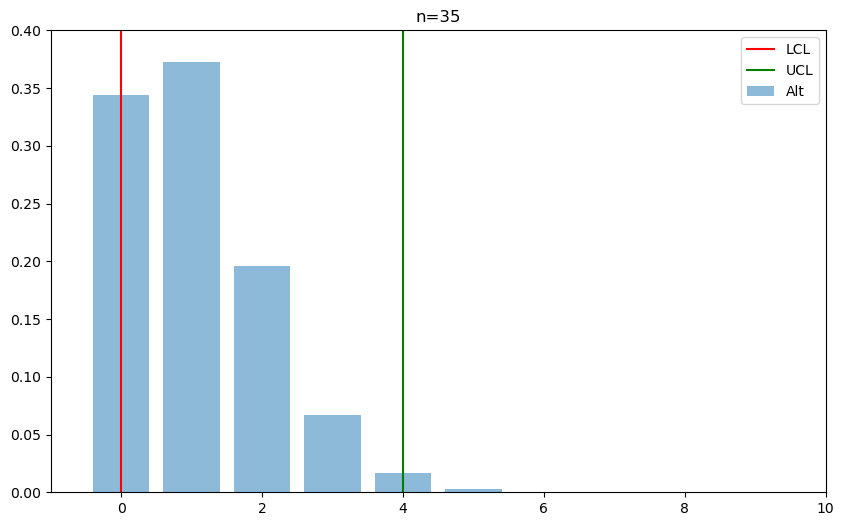

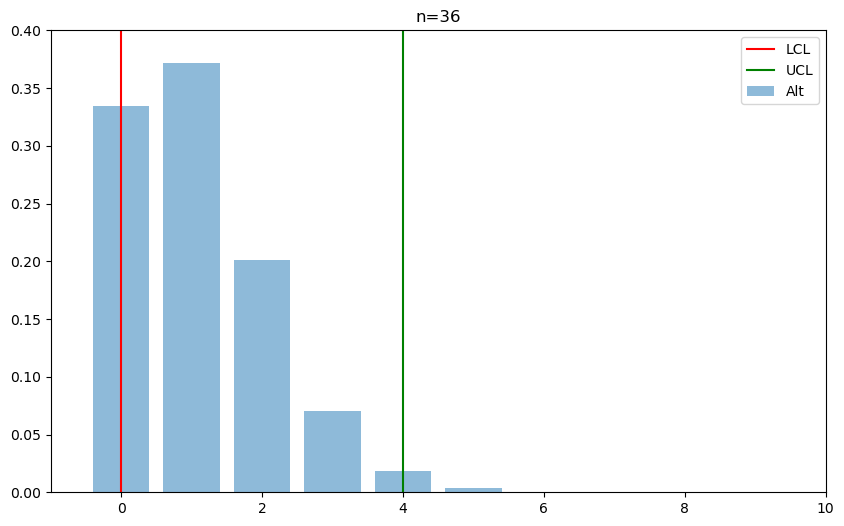

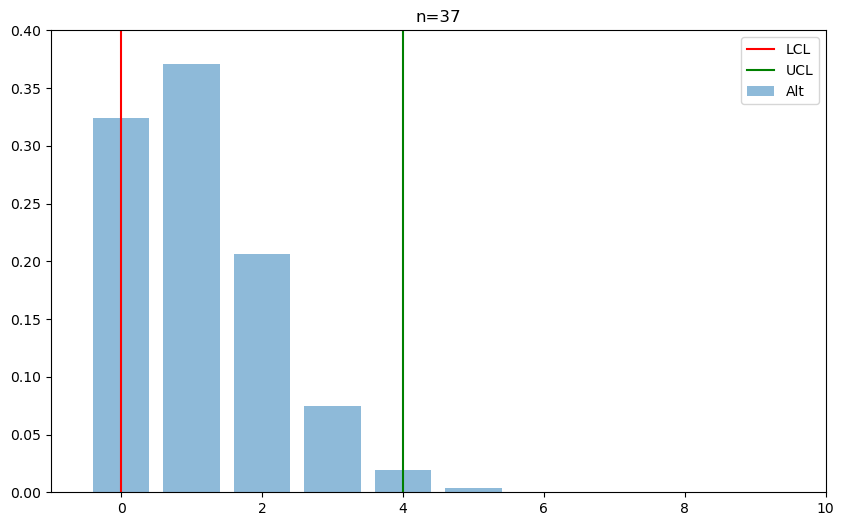

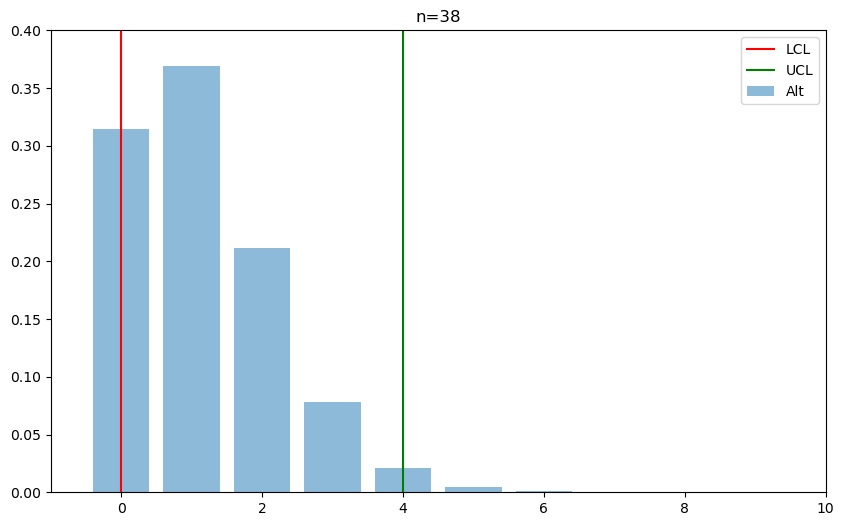

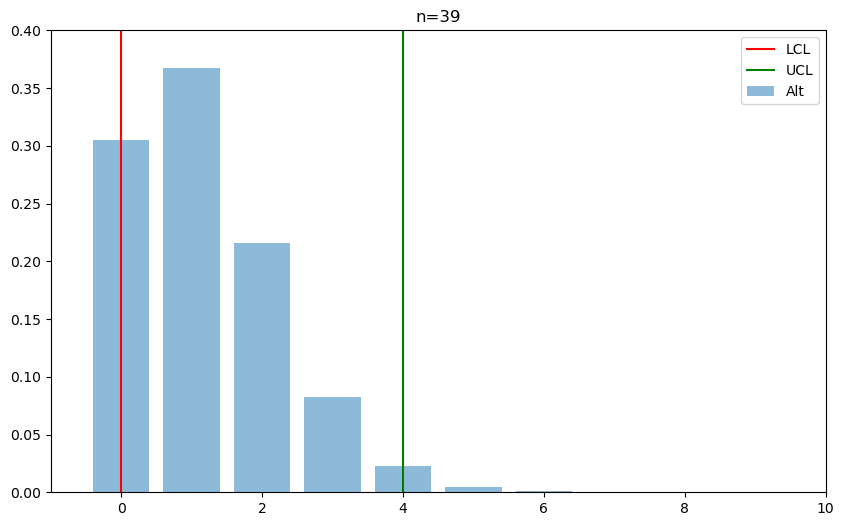

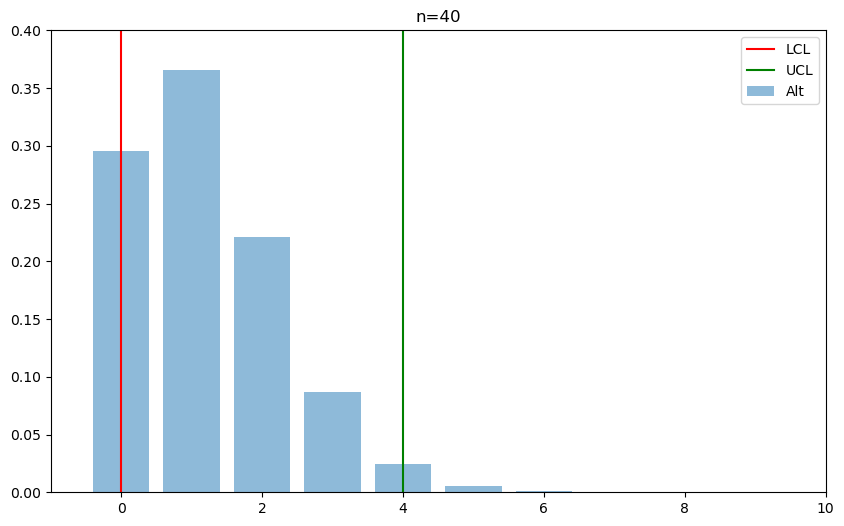

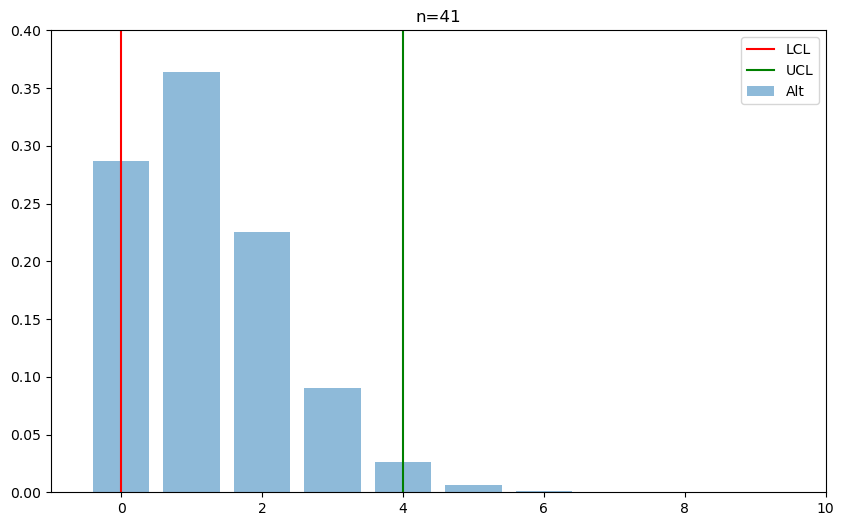

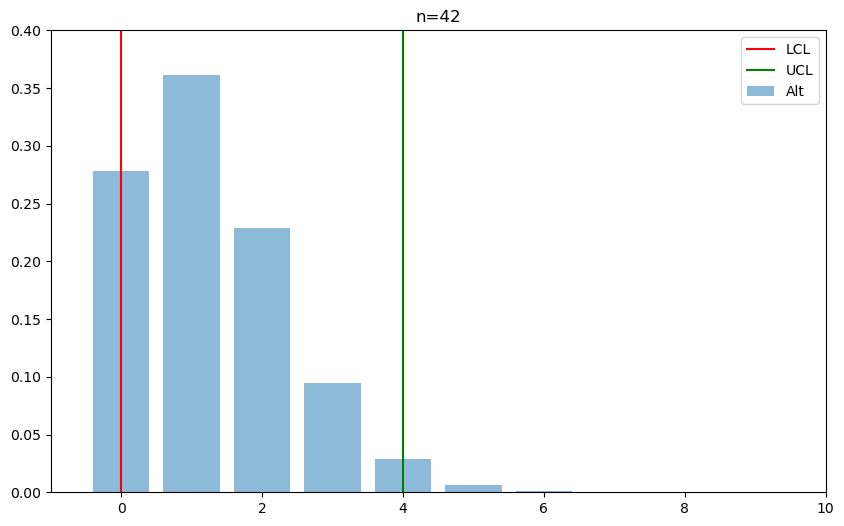

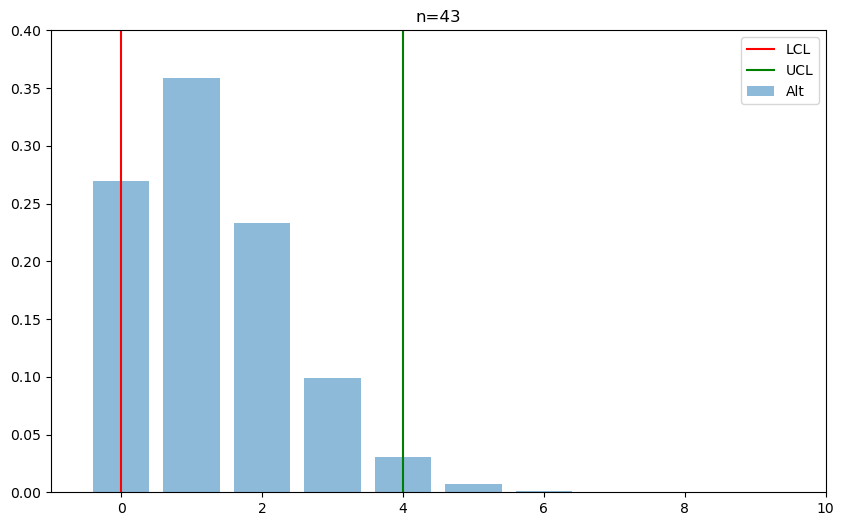

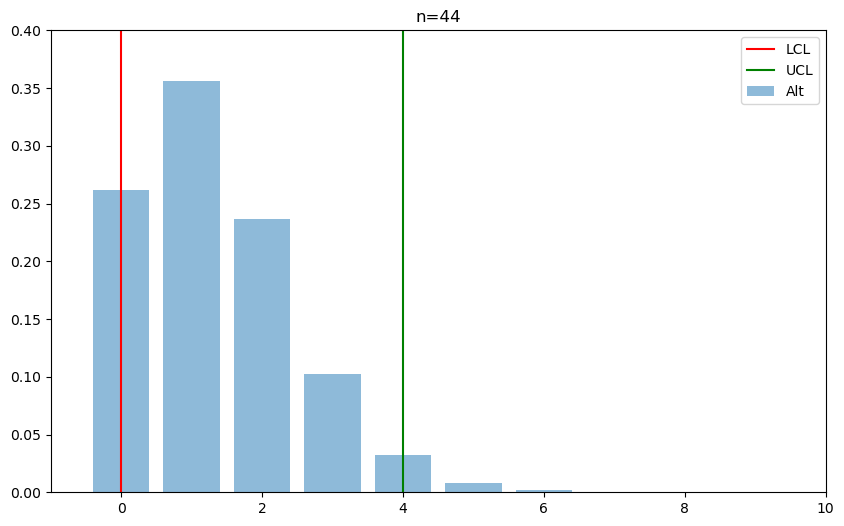

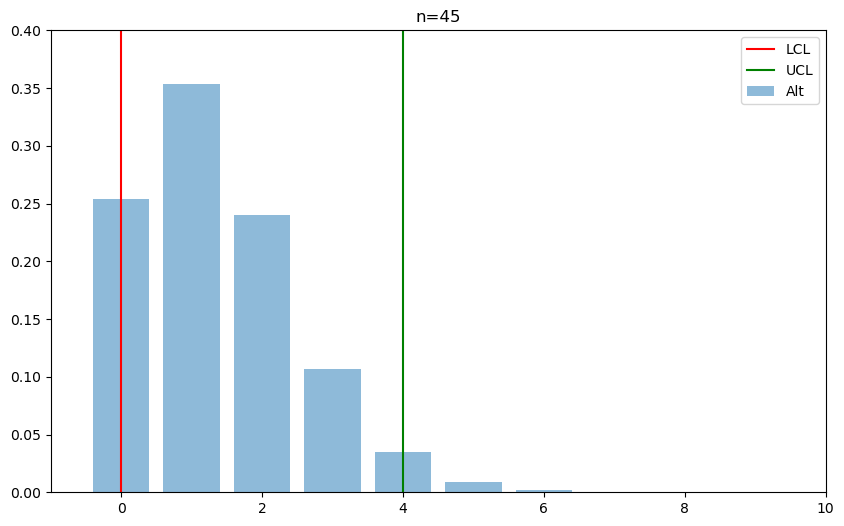

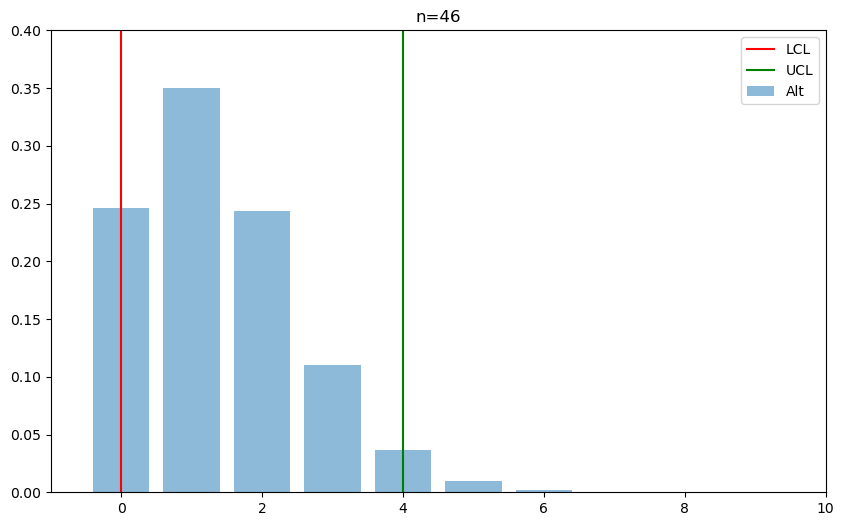

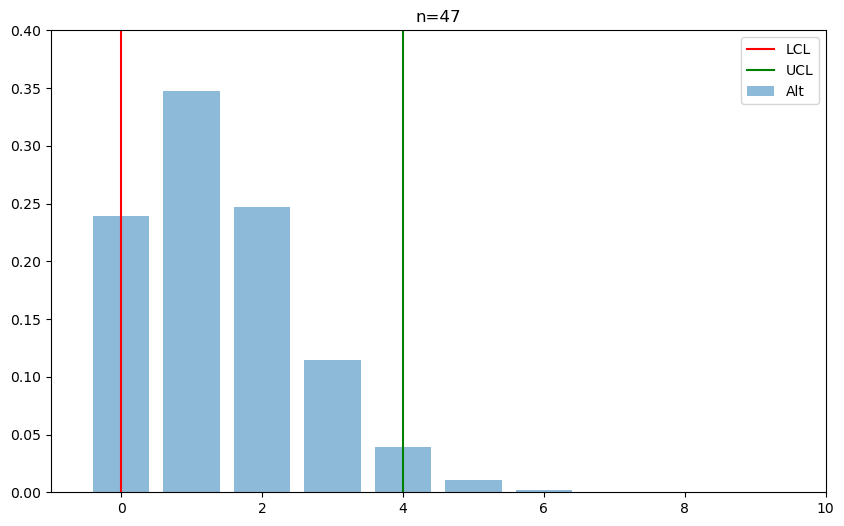

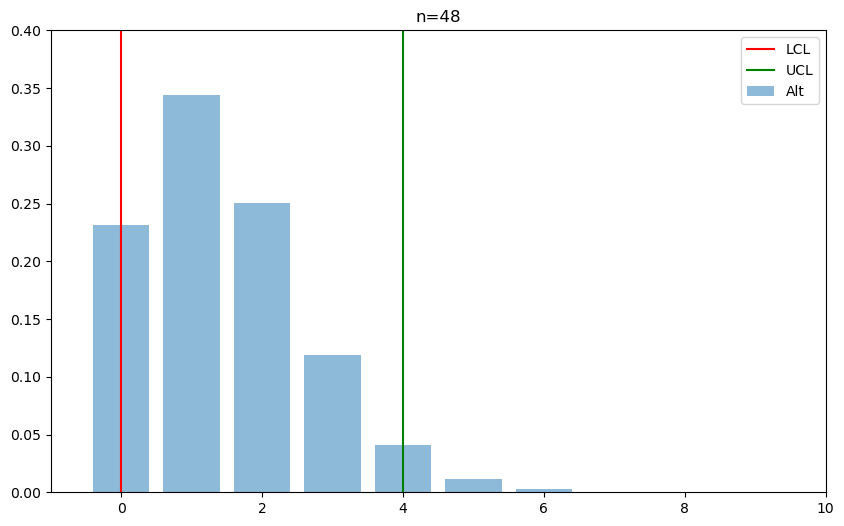

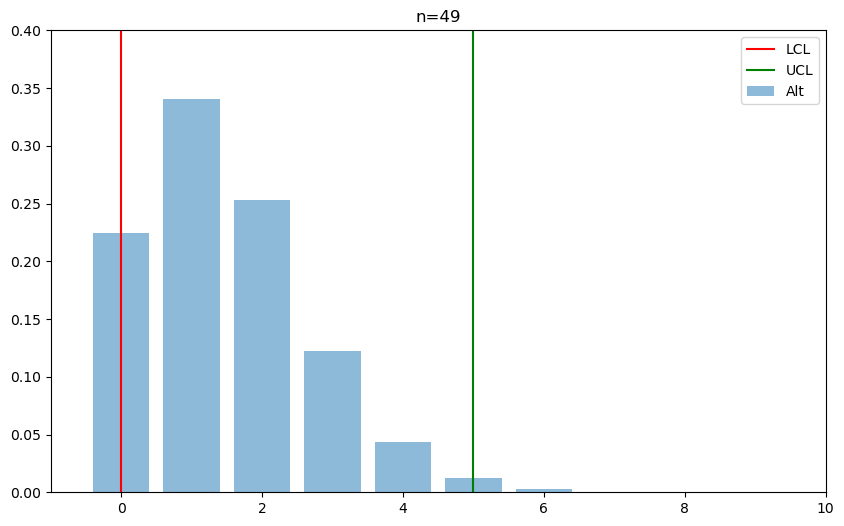

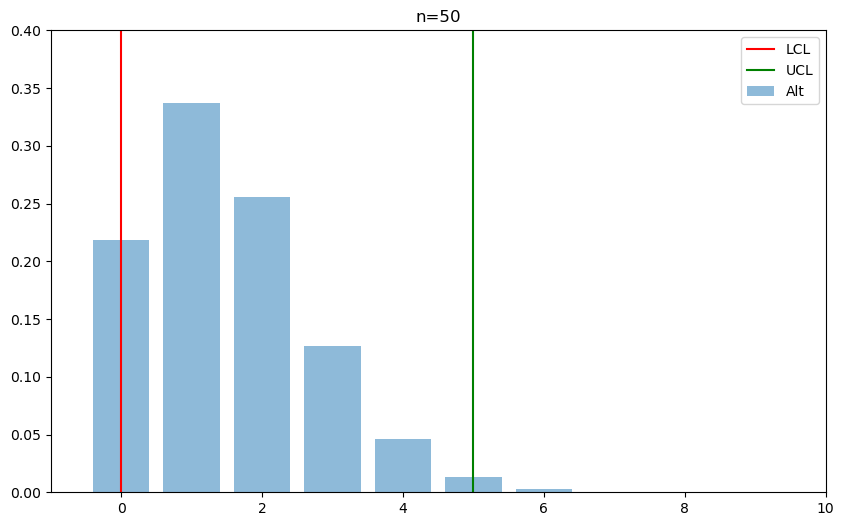

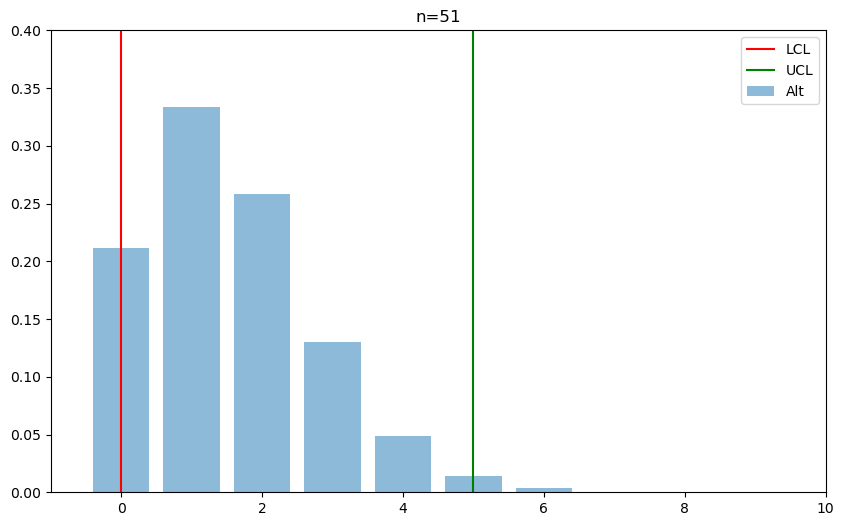

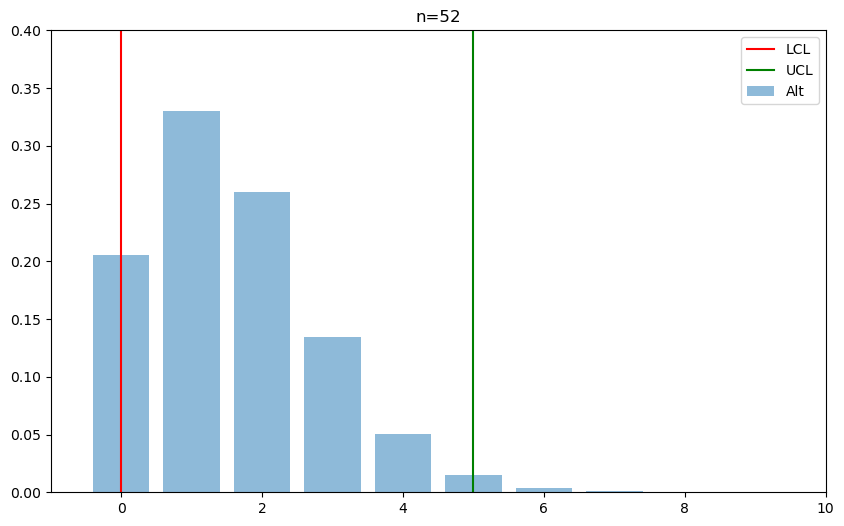

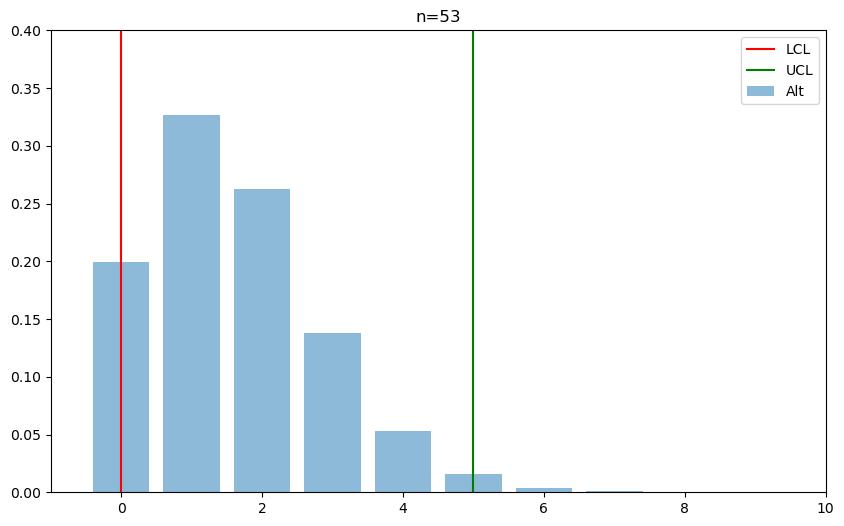

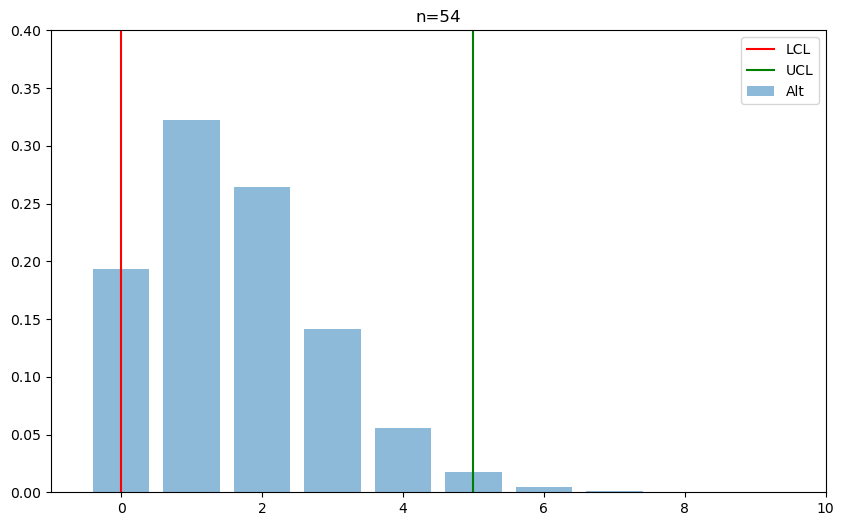

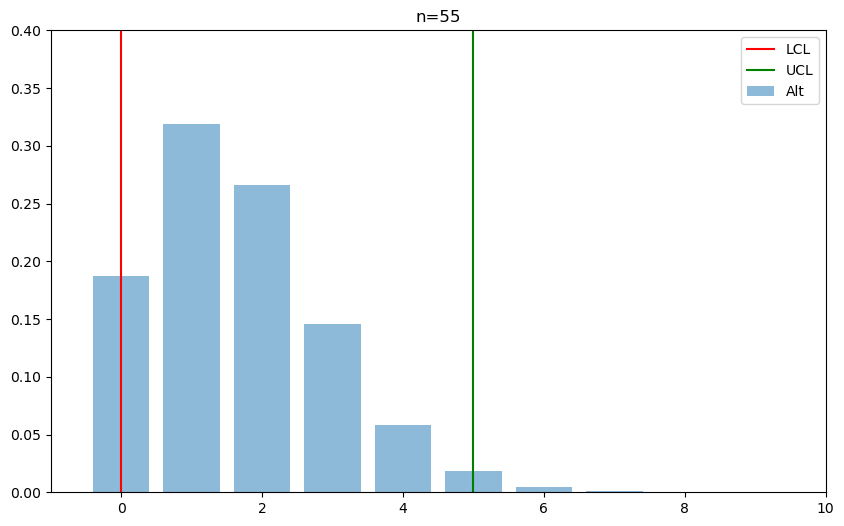

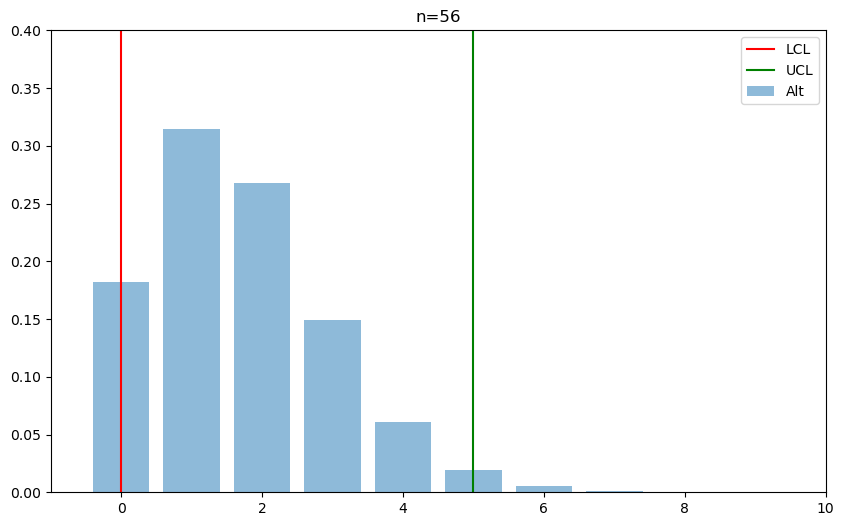

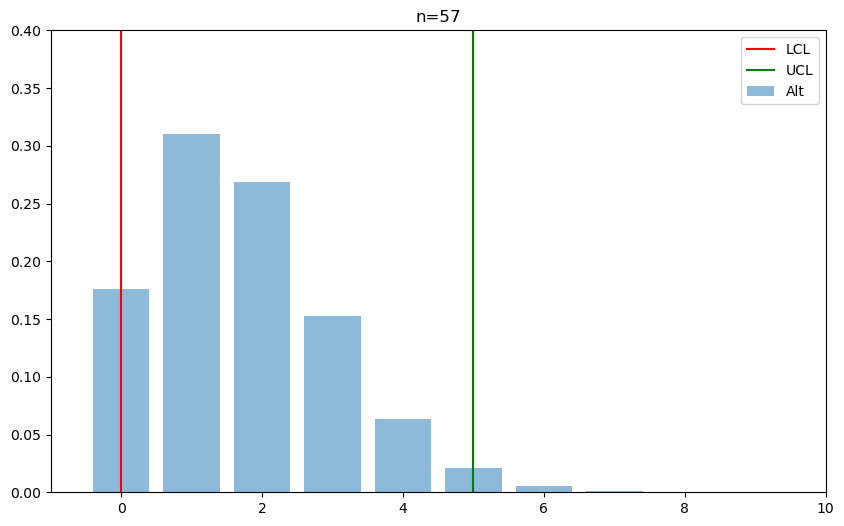

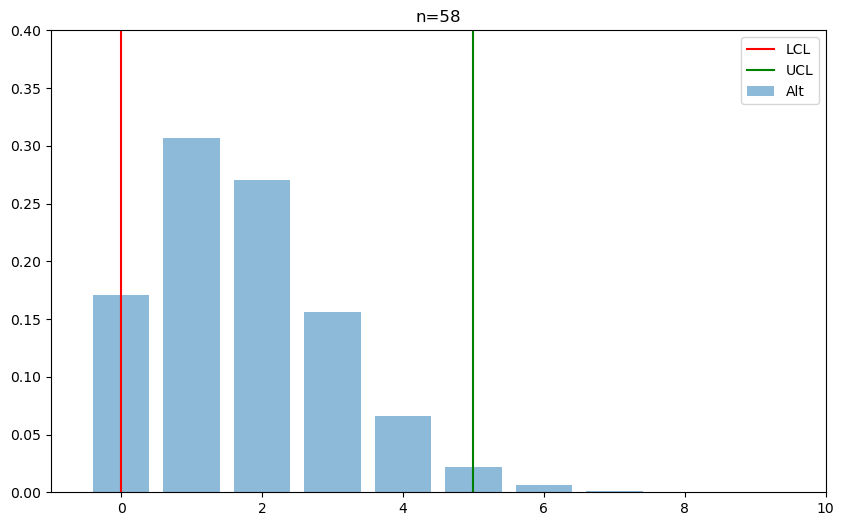

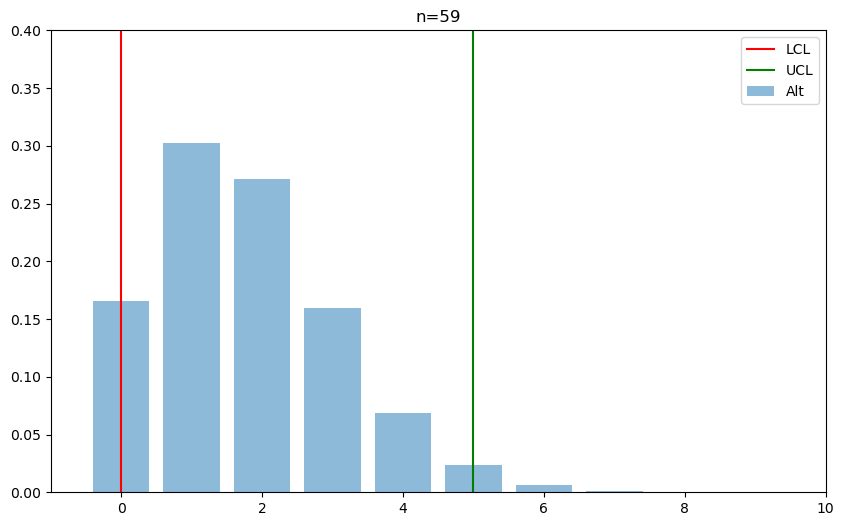

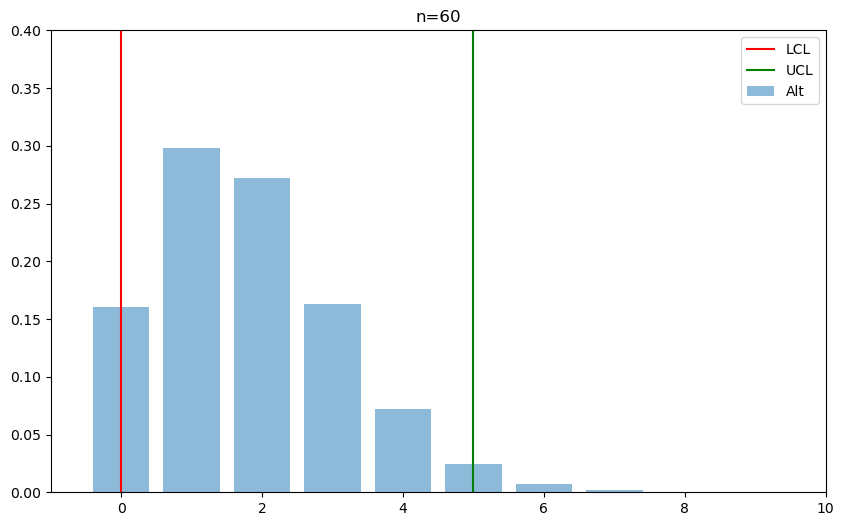

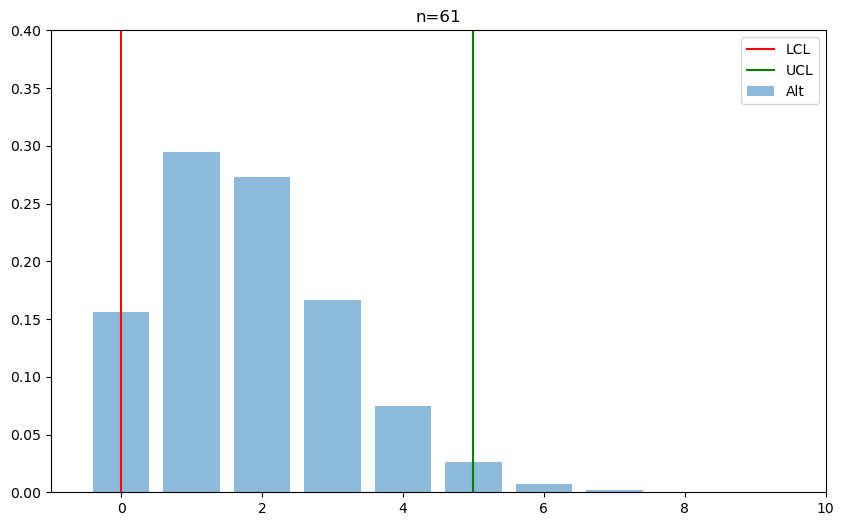

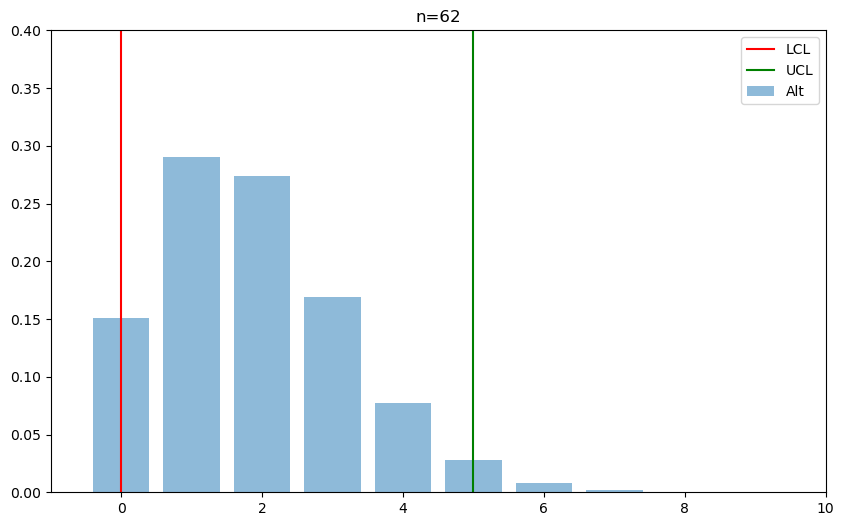

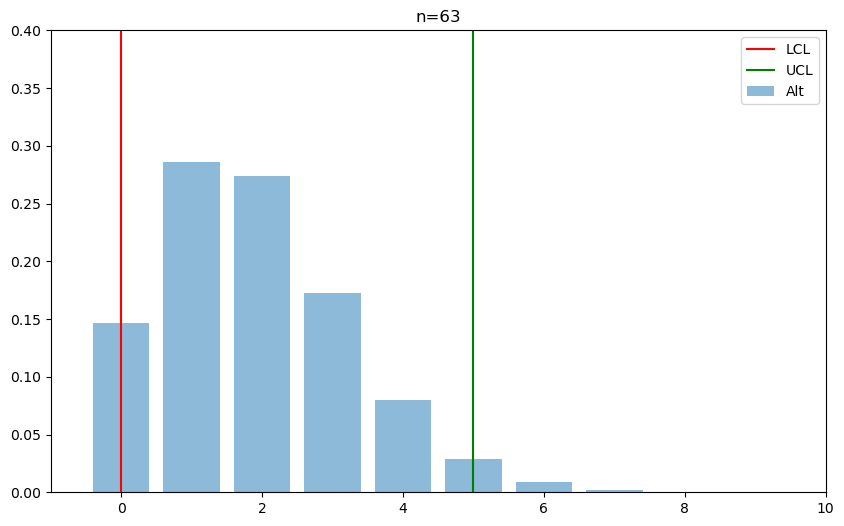

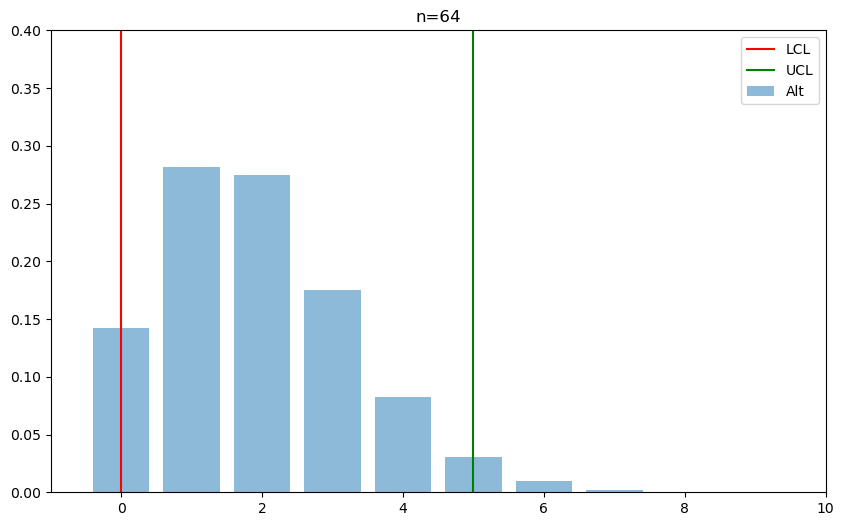

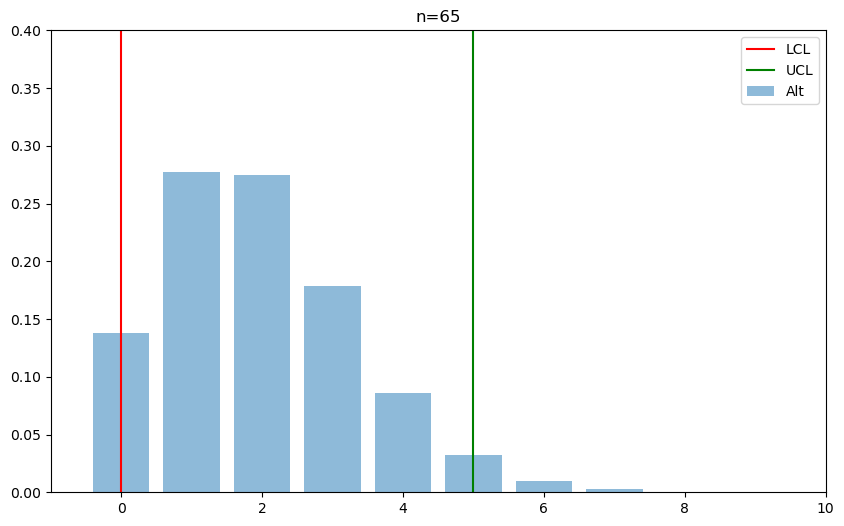

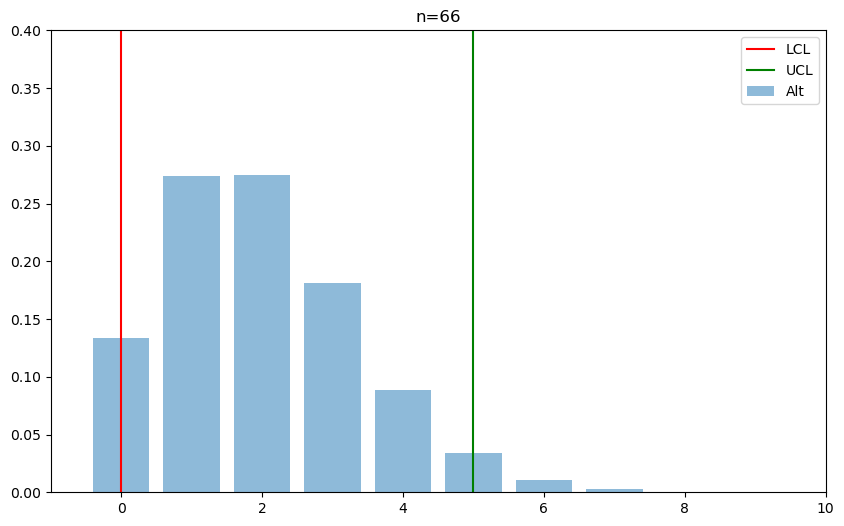

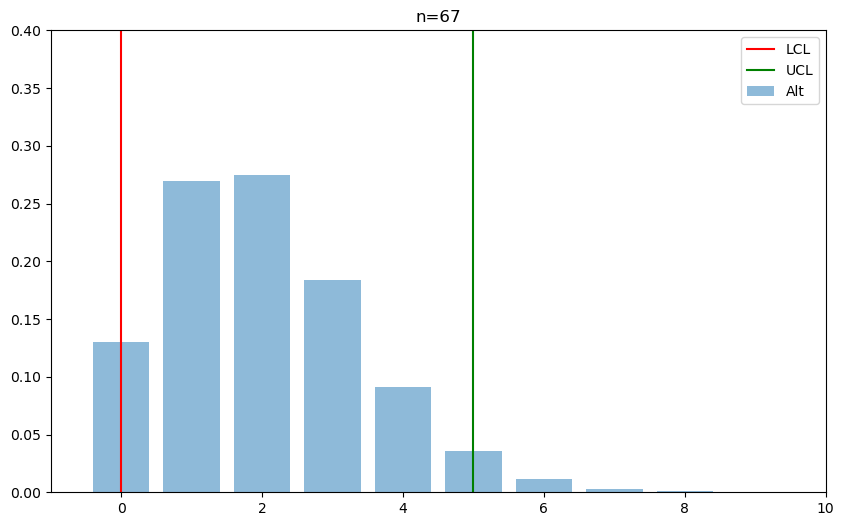

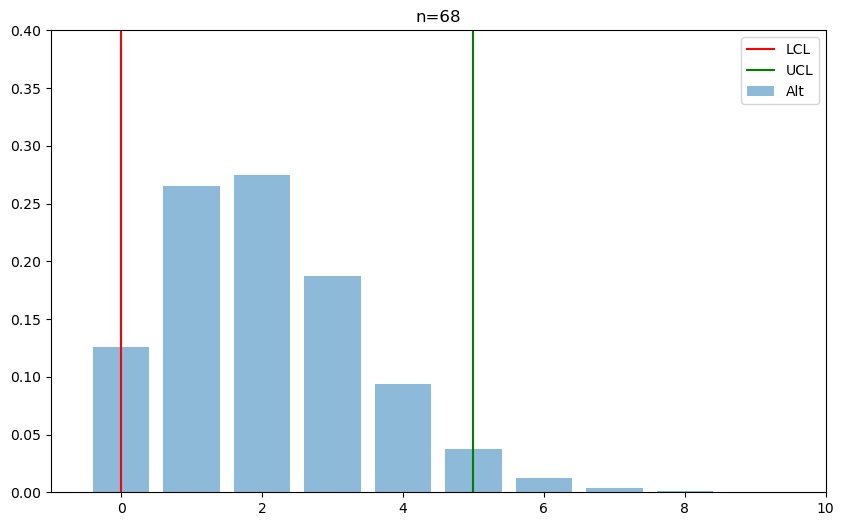

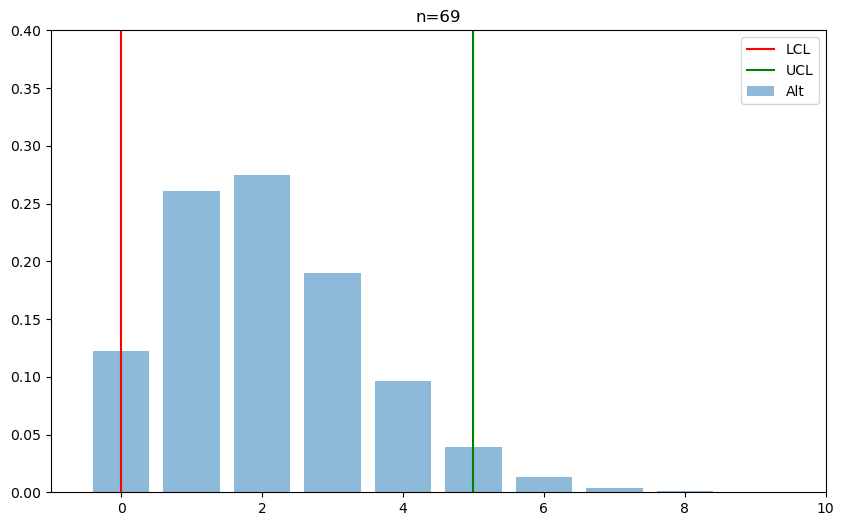

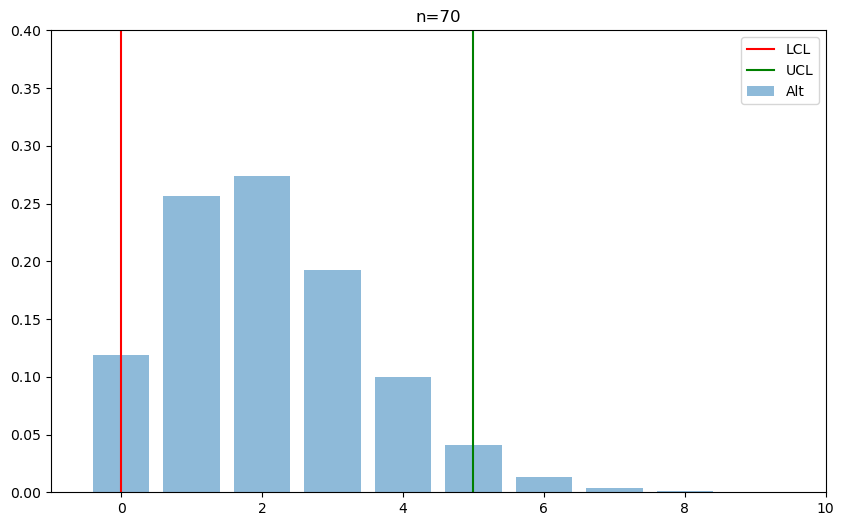

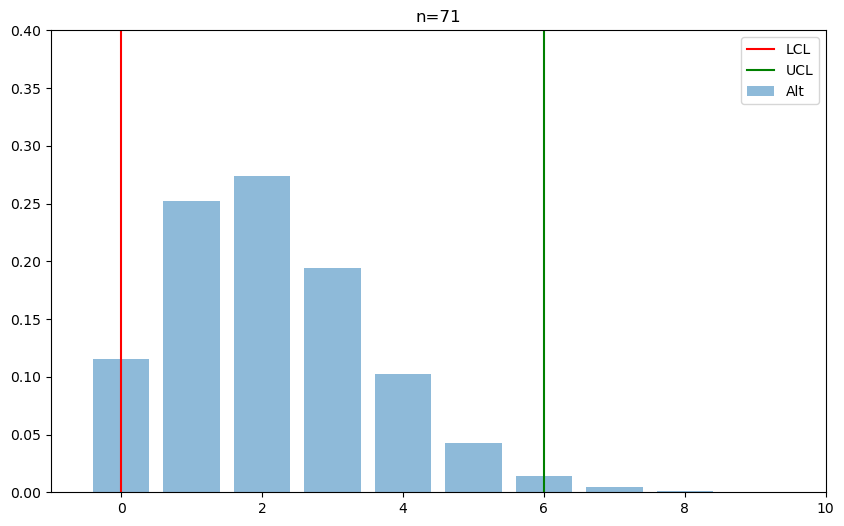

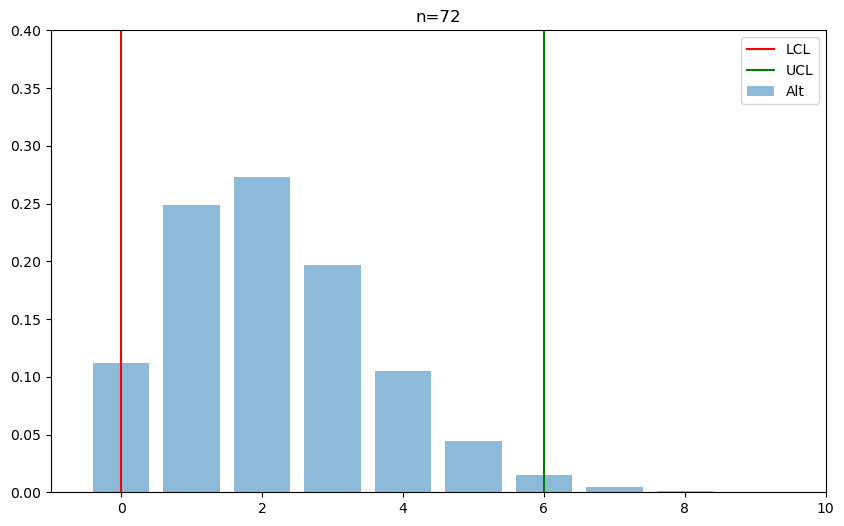

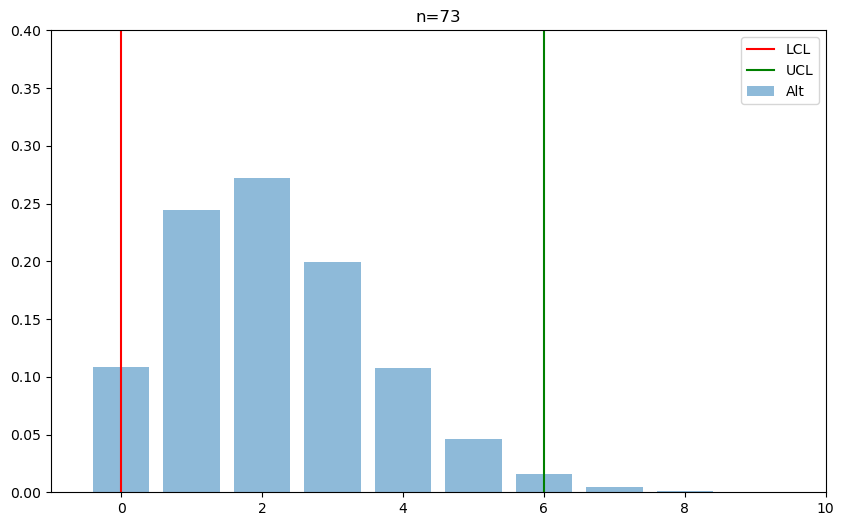

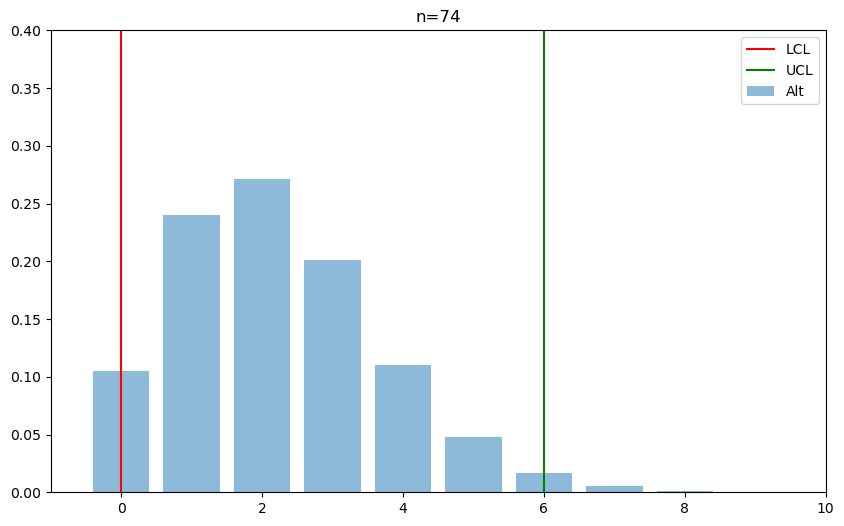

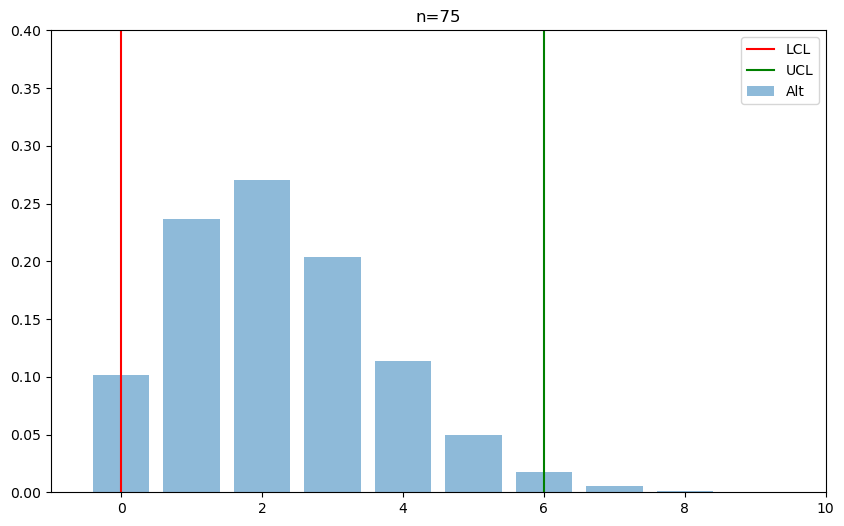

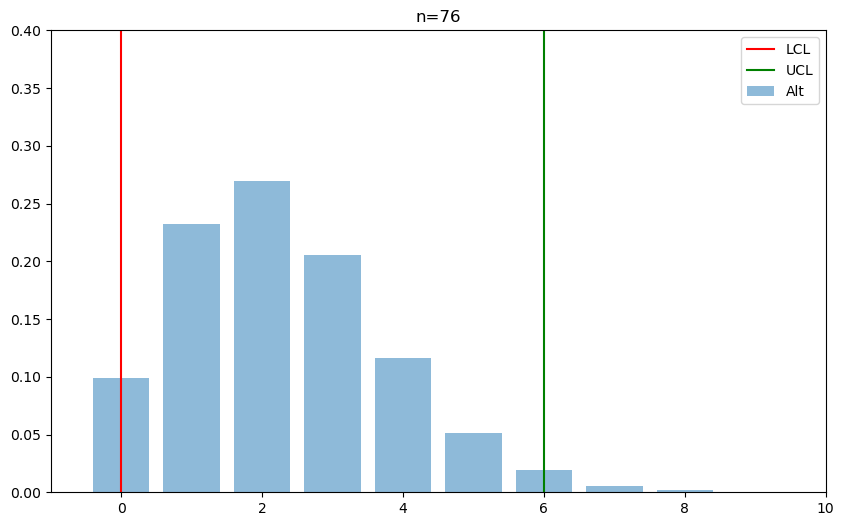

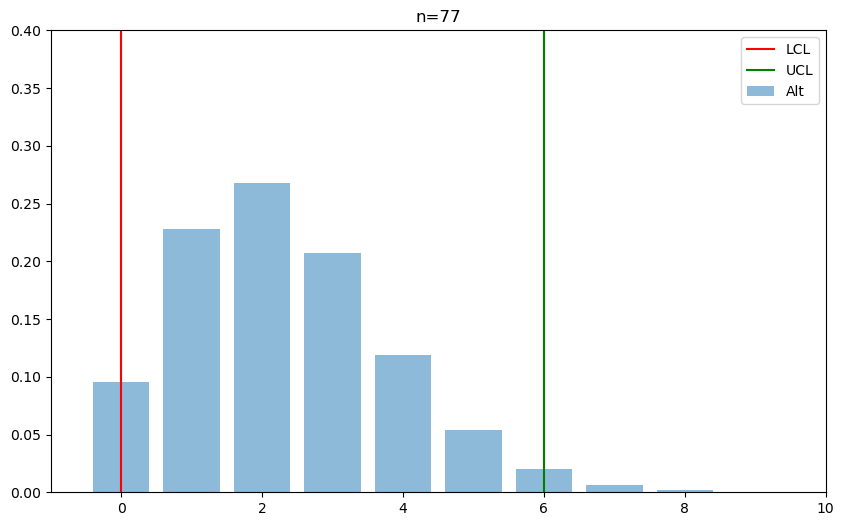

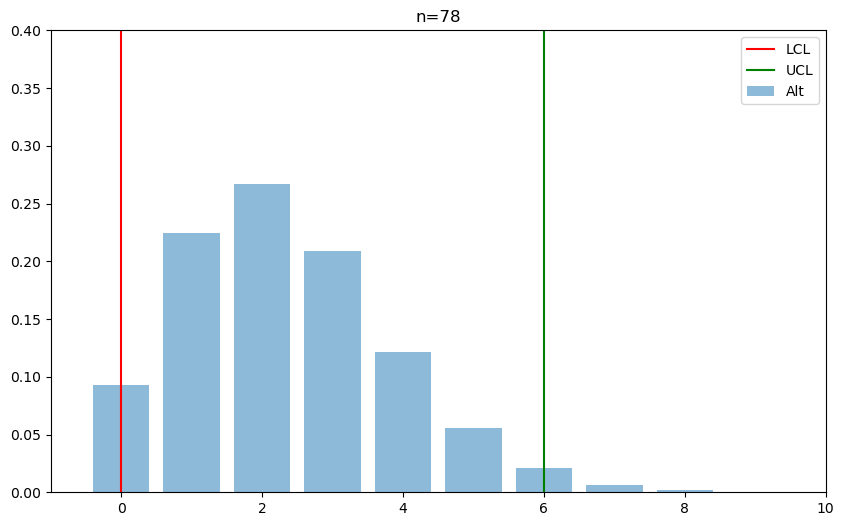

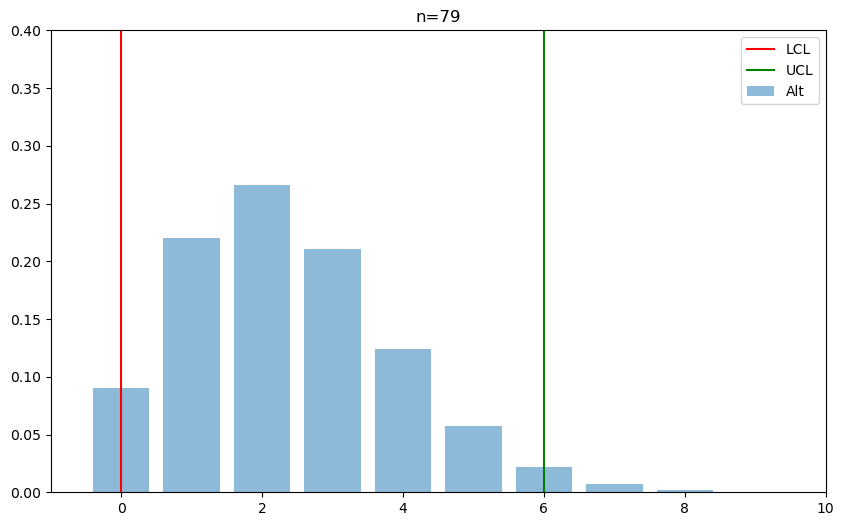

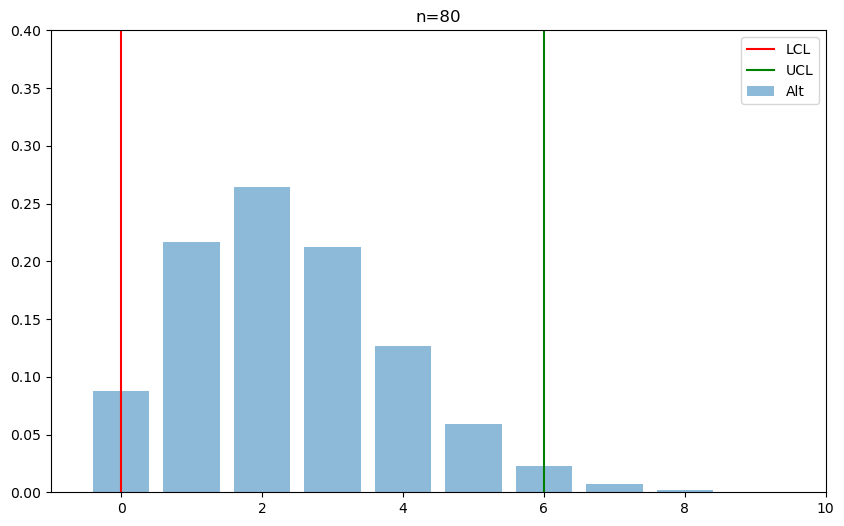

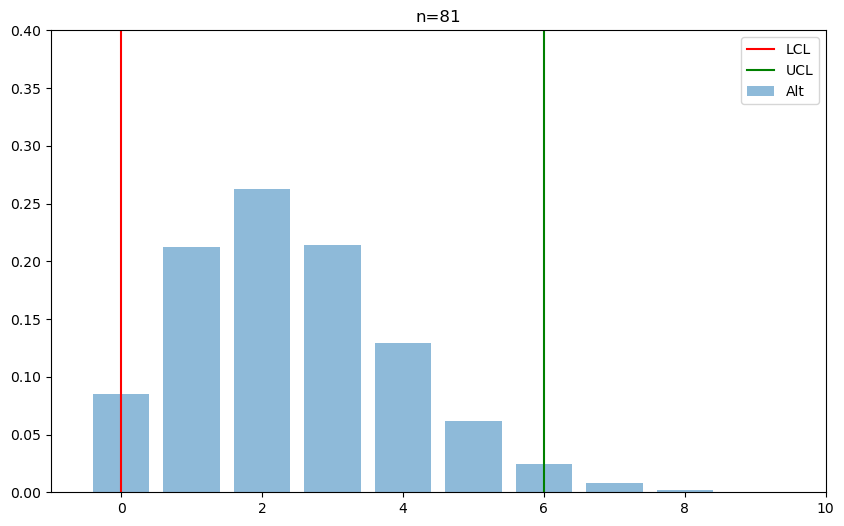

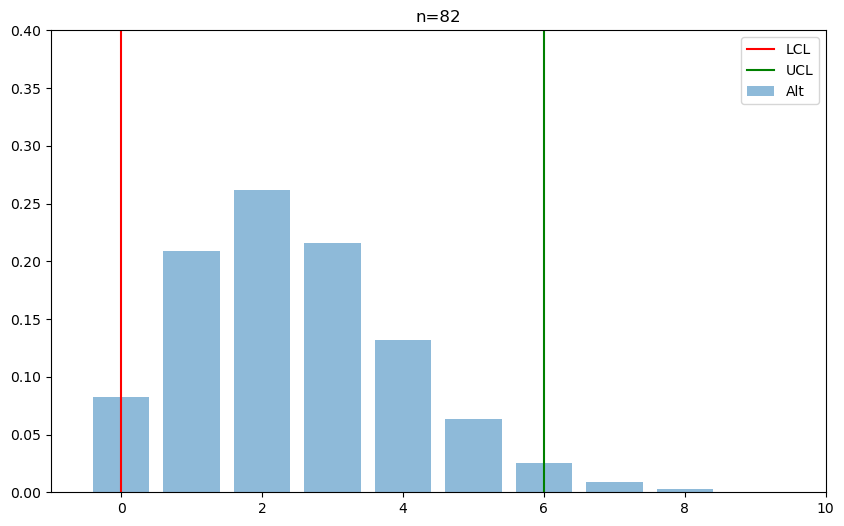

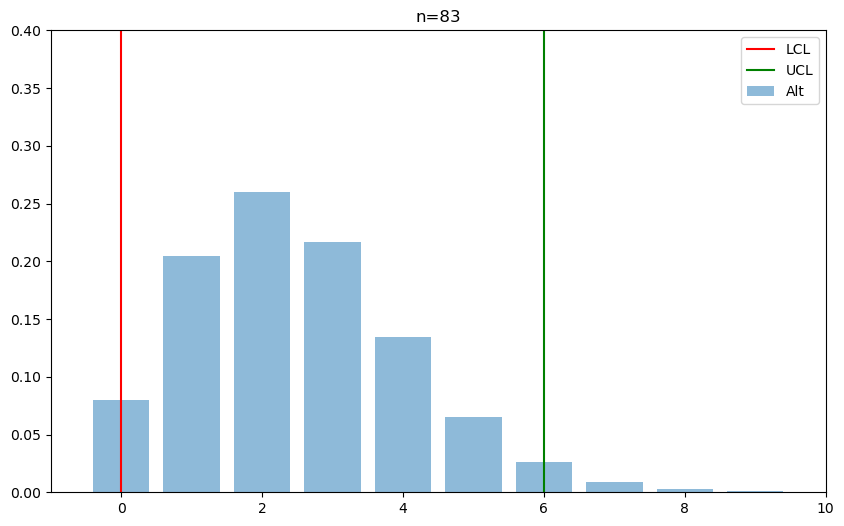

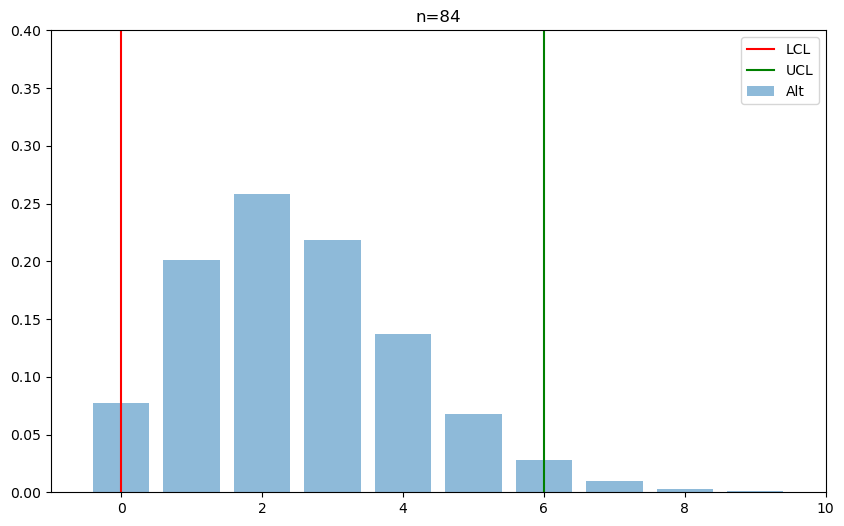

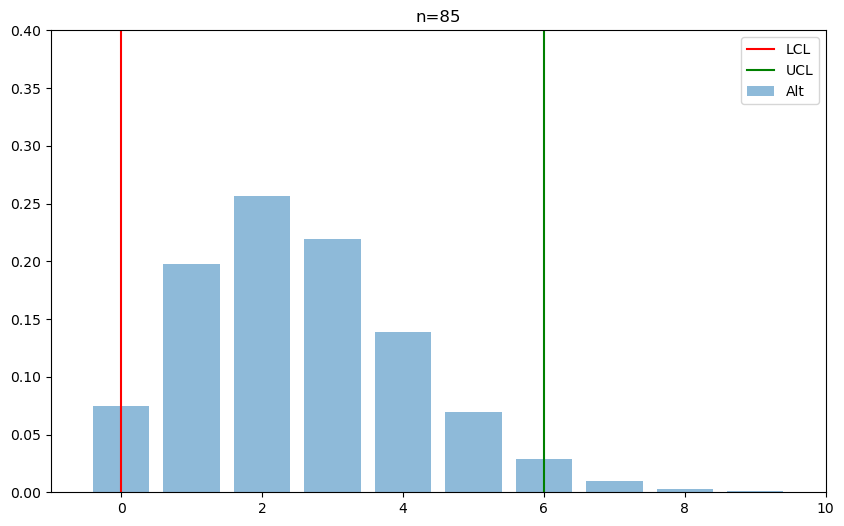

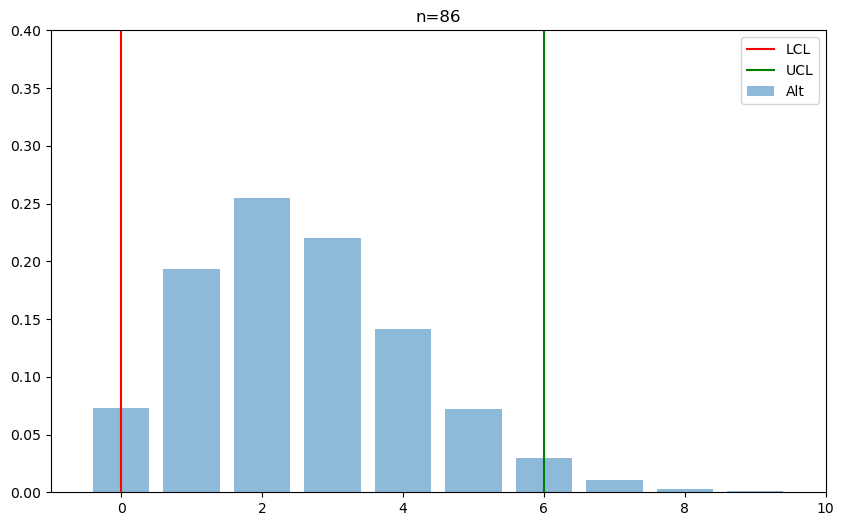

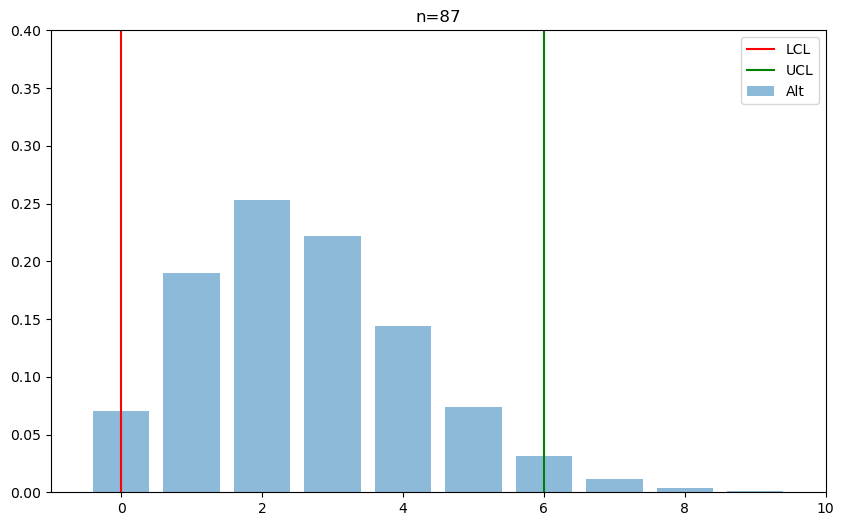

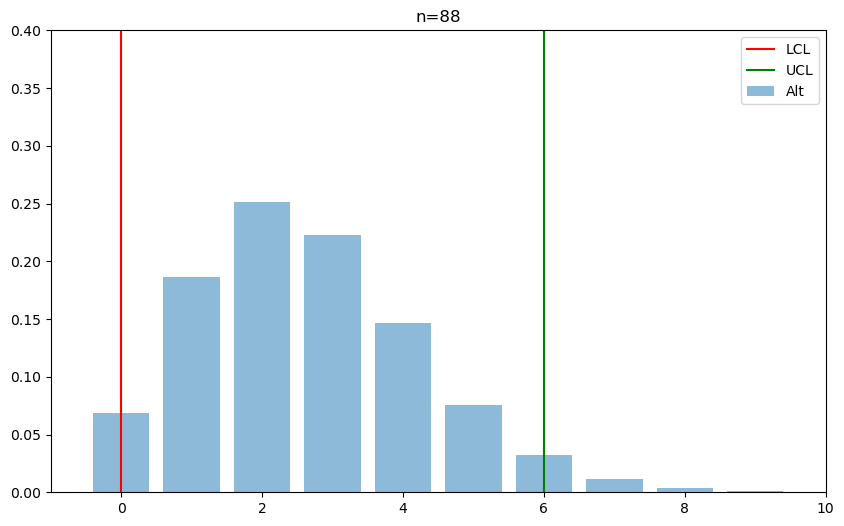

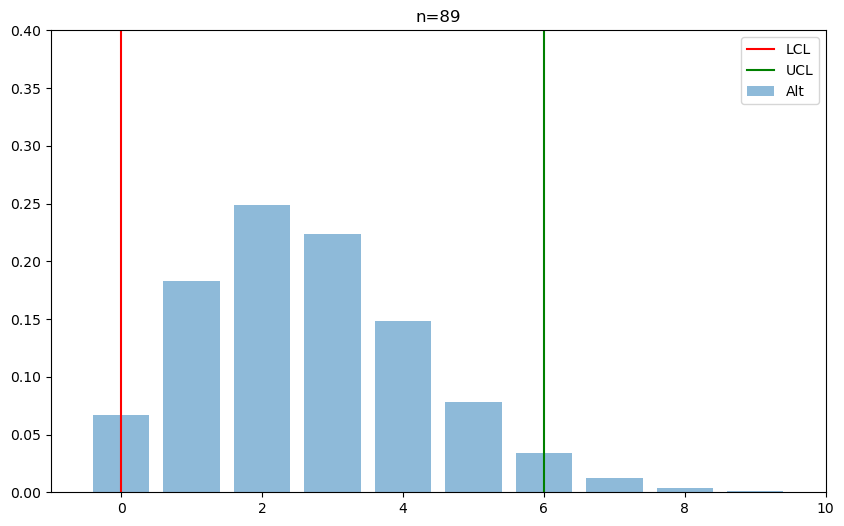

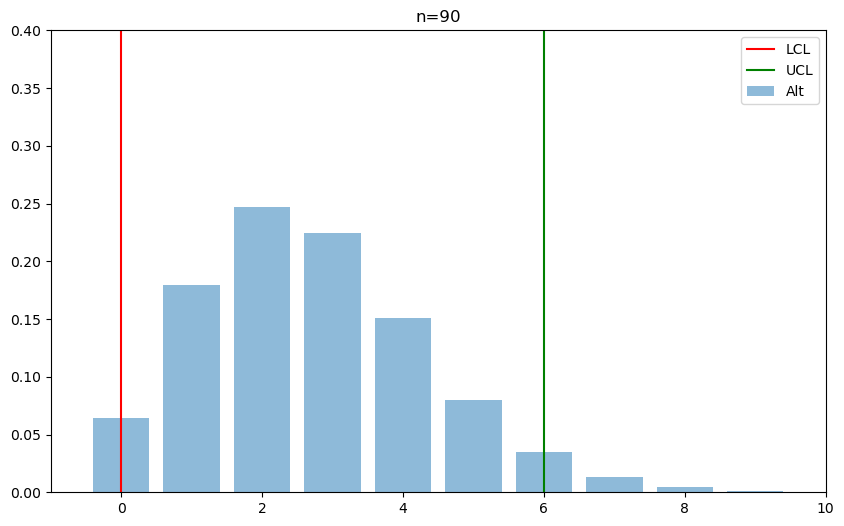

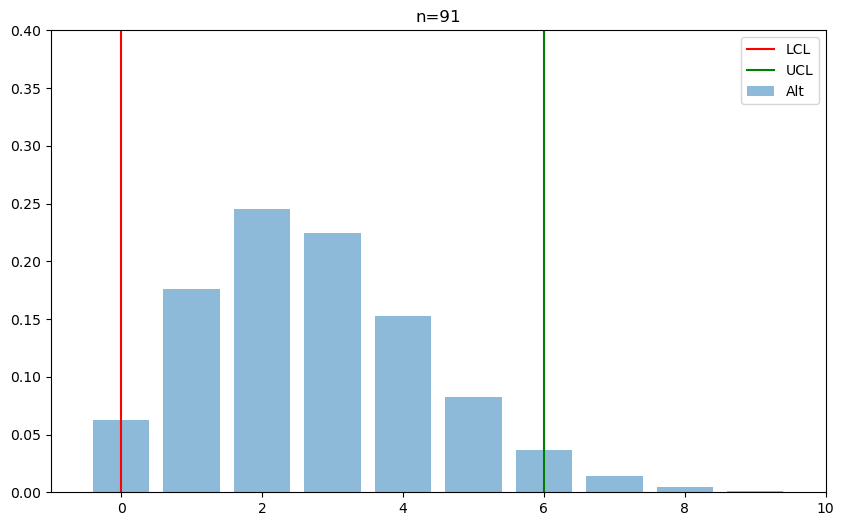

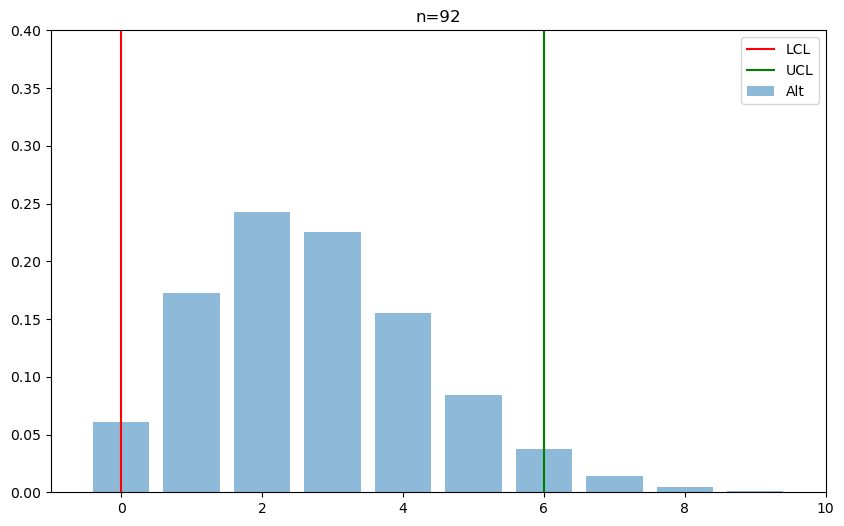

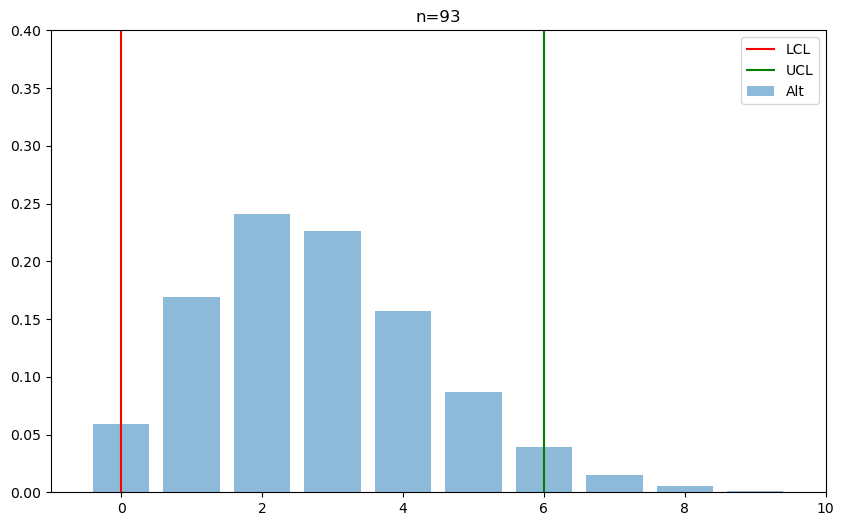

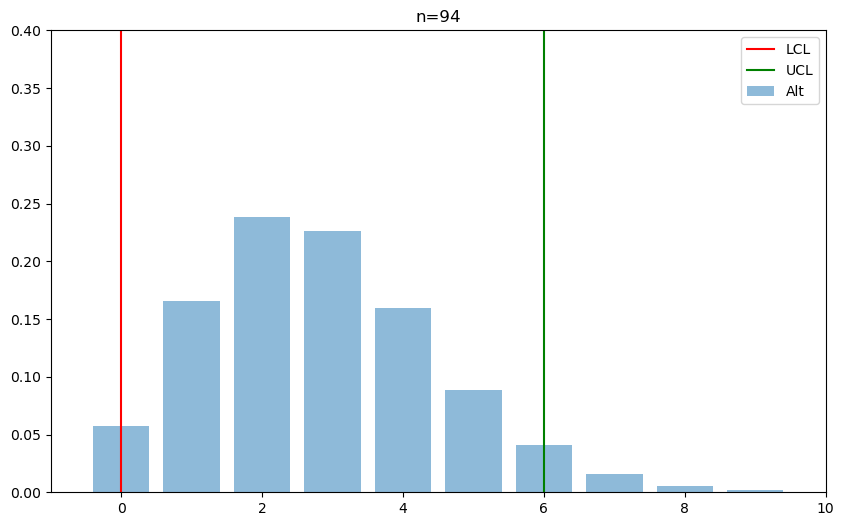

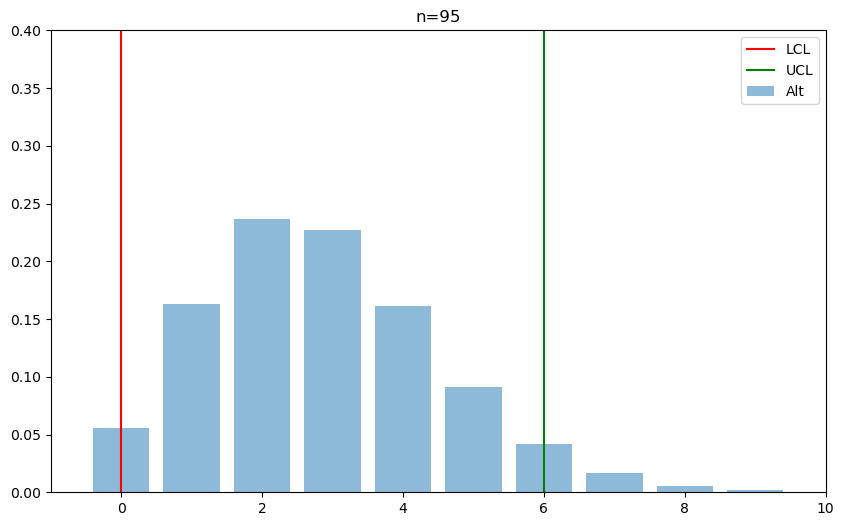

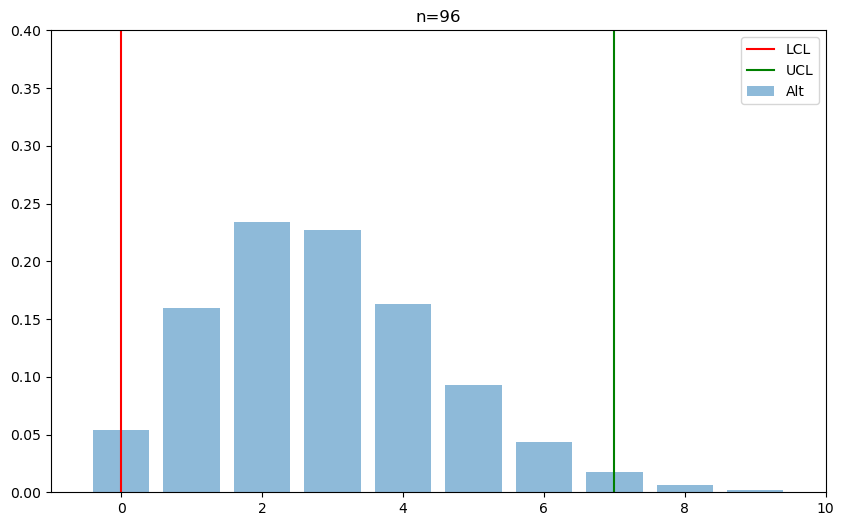

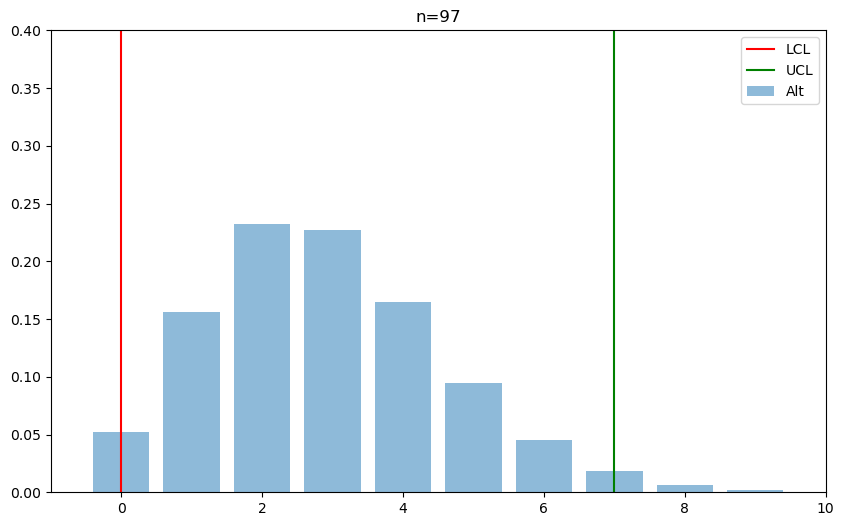

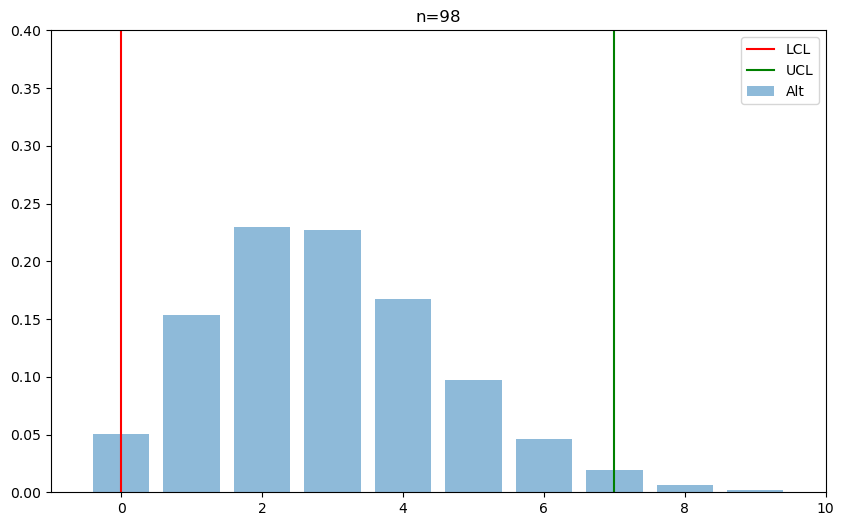

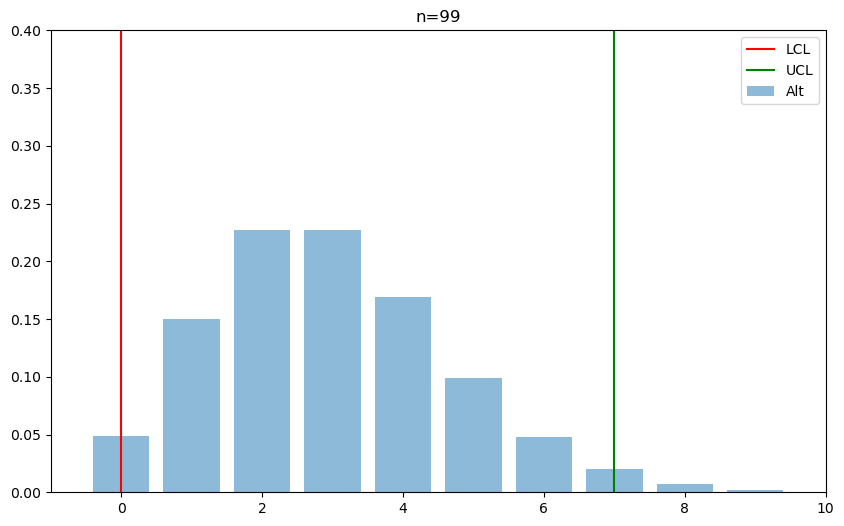

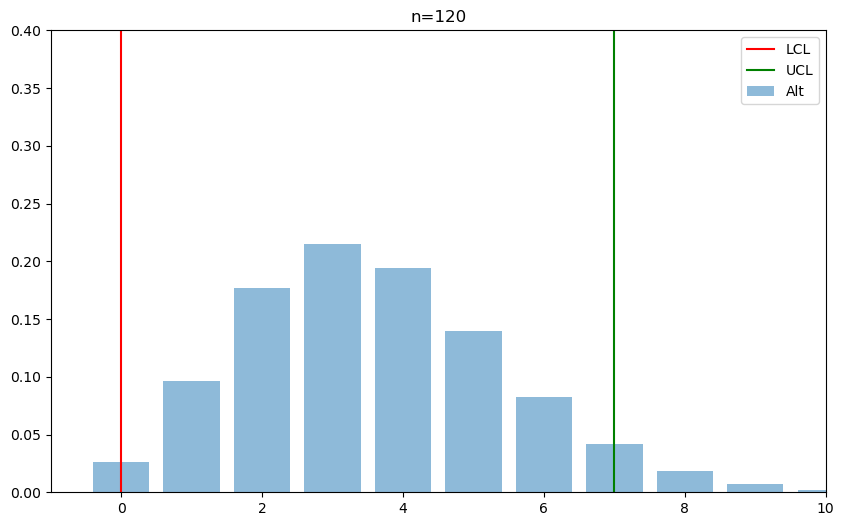

In [149]:

frames = []
for n_current in list(np.arange(2,100))+[120]:
    index_current = list(n_list).index(n_current)
    plt.figure(figsize=(10, 6))
    #x, y = get_binomial(n_current, p_0)
    #plt.bar(x, y, alpha=0.5, label=f'Null')
    x, y = get_binomial(n_current, p_1)
    plt.bar(x, y, alpha=0.5, label=f'Alt')    
    plt.axvline(x=LCL_list[index_current], color='r', label='LCL')
    plt.axvline(x=UCL_list[index_current], color='g', label='UCL')
    plt.title(f'n={n_current}')
    plt.legend()
    plt.xlim([-1, 10])
    plt.ylim([0, 0.4])  # set a consistent y-axis limit for all plots
    # Save the current plot as a frame of the gif
    fig = plt.gcf()
    canvas = fig.canvas
    canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    image = Image.fromarray(image)
    frames.append(image)

for n_current in list(np.arange(100,800,10))+[900,1000]:
    index_current = list(n_list).index(n_current)
    plt.figure(figsize=(10, 6))
    #x, y = get_binomial(n_current, p_0)
    #plt.bar(x, y, alpha=0.5, label=f'Null')
    x, y = get_binomial(n_current, p_1)
    plt.bar(x, y, alpha=0.5, label=f'Alt')    
    plt.axvline(x=LCL_list[index_current], color='r', label='LCL')
    plt.axvline(x=UCL_list[index_current], color='g', label='UCL')
    plt.title(f'n={n_current}')
    plt.legend()
    plt.xlim([-1, 30])
    plt.ylim([0, 0.4])  # set a consistent y-axis limit for all plots
    # Save the current plot as a frame of the gif
    fig = plt.gcf()
    canvas = fig.canvas
    canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    image = Image.fromarray(image)
    frames.append(image)
    plt.close()

# Save the frames as a gif
imageio.mimsave('binomial_Alt.gif', frames, fps=1)

I tried to figure it out, and the best explanation I got so far is as follows:

Increasing n increase both UCL  (pushes it to right) and also pushes the null hypothesis to the right (Pushes CL to the right and spreads the dist).
If the movement of the UCL to the right is very slow, we end up adding more mass between the LCL and UCL thus increasing beta. 
This happens at very low n and every now and then at high n (i.e. the zigzag-like trend when UCL is not moving at the video). 

# Winter 2021 Code

NameError: name 'P_hat' is not defined

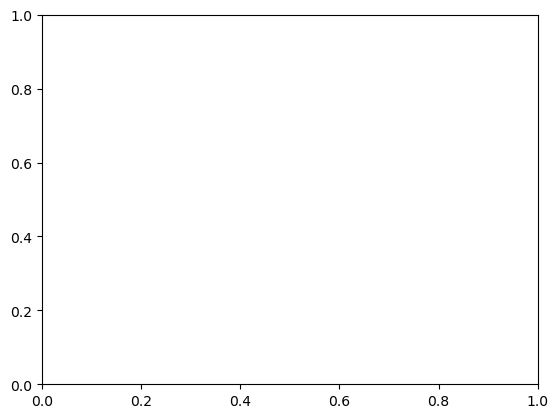

In [ ]:


CL_P_bar=P_bar

P_Par_UCL=CL_P_bar+3*np.sqrt(CL_P_bar*(1-CL_P_bar)/n)
P_Par_LCL=CL_P_bar-3*np.sqrt(CL_P_bar*(1-CL_P_bar)/n)

if P_Par_LCL<0: #Note that we changed the LCL to zero since it was negative 
    P_Par_LCL=0

ax = plt.figure().gca()
ax.plot(P_hat,marker="o")
ax.axhline(y = CL_P_bar, color = 'r', linestyle = '-')
ax.axhline(y = P_Par_LCL, color = 'r', linestyle = '-')
ax.axhline(y = P_Par_UCL, color = 'r', linestyle = '-')

from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('P chart')
plt.show()
print(f'The centeral limit for the P chart is {CL_P_bar}')
print(f'The upper limit for the P chart is {P_Par_UCL}')

print(f'The lowe limit for the P chart is {P_Par_LCL}')

In [ ]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)


In [ ]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()


In [ ]:
UCL_s

In [ ]:
s

In [ ]:
s.ge(UCL_s)

In [ ]:
s.le(LCL_s)

s.le(LCL_s)

In [ ]:
Mask_to_remove_1=[s_i < LCL_s or s_i > UCL_s for s_i in list(s)]
Mask_to_remove_1
# #Equvilantely
# Mask_to_remove_1=(s.ge(UCL_s) | s.le(LCL_s))

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_1]=np.nan
df

In [ ]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)


In [ ]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()

# End of week 5. (o6 Feb 2023)
# Start of week 6

# Next Phase #1 for the X_bar

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_1]=np.nan # Use only the samples that are within the control limits of S chart from phase 1
df

In [ ]:
xbar=df.mean(axis=1) #mean for each sample
x_bar_bar=xbar.mean() #mean of all sample means
A3=AppendixVI(n,factor='A3')
UCL_x_bar=x_bar_bar+A3*s_bar
LCL_x_bar=x_bar_bar-A3*s_bar
CL_x_bar=x_bar_bar
print(UCL_x_bar,CL_x_bar,LCL_x_bar)

ax = plt.figure().gca()
ax.plot(xbar.index,xbar,marker="o")
ax.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('X-bar chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$\overline{X}_i$')
plt.show()

In [ ]:
Mask_to_remove_2=[x_i < LCL_x_bar or x_i > UCL_x_bar for x_i in list(xbar)]


In [ ]:
Mask_to_remove_2

In [ ]:

Mask_to_remove_21=[Mask_to_remove_1[i] or Mask_to_remove_2[i] for i in range(len(Mask_to_remove_1))]

In [ ]:
Mask_to_remove_21

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_21]=np.nan
df

In [ ]:
xbar=df.mean(axis=1) #mean for each sample
x_bar_bar=xbar.mean() #mean of all sample means
A3=AppendixVI(n,factor='A3')
UCL_x_bar=x_bar_bar+A3*s_bar
LCL_x_bar=x_bar_bar-A3*s_bar
CL_x_bar=x_bar_bar
print(UCL_x_bar,CL_x_bar,LCL_x_bar)

ax = plt.figure().gca()
ax.plot(xbar.index,xbar,marker="o")
ax.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('X-bar chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$\overline{X}_i$')
plt.show()

# X bar chart phase 1 is done (for now)
## Next we make sure that we still have stable (aka everything in bound) in the s chart

In [ ]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_21]=np.nan #Note that we are using the same last mask, 
#because nothing was OUTSIDE the control limits of the X-bar chart after revising it.
df

In [ ]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)

ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()

# Luckly everything is still in bound for s chart. If not we would have started this process for one more cycle.
## Now we can move to the process paramater estimation to conclude phase 1 

In [ ]:
c_4=AppendixVI(n,factor='c4')
sigma=s_bar/c_4 #estimated of process standard deviation, think of sigma_o in hypothesis testing
print(sigma)
mu=x_bar_bar #estimated of process mean, think of mu_o in hypothesis testing
print(mu)

# End of phase 1 now we can use this chart for next phase 2 and do actual process montoring.